<a href="https://colab.research.google.com/github/ife01/ml-basics/blob/master/NLP_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disaster Tweet Classification: An End-to-End NLP Tutorial 🌪️ Moji vs. Real Life**

Welcome to this hands-on Natural Language Processing (NLP) project! We'll tackle the "NLP with Disaster Tweets" challenge, a popular Kaggle competition. Our goal is to build a model that can distinguish between tweets announcing actual disasters and those just metaphorically using disaster-related words.

🚀 **The Challenge: Is it a Real Disaster?**

Twitter has become an indispensable tool for real-time information, especially during emergencies. Disaster relief organizations, news agencies, and individuals rely on it to monitor events as they unfold. However, the informal and often metaphorical nature of tweets makes it tricky for machines to understand if a tweet like:

"On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE 🔥🔥🔥"

is talking about a beautiful sunset or an actual fire. Humans can often tell the difference, especially with context or visual aids, but machines need to learn!

In this competition and in this notebook, we'll train a machine learning model to make this distinction. To help us, we have a dataset of over 10,000 hand-classified tweets.

Evaluation Metric: Our model's performance will be judged using the F1-score, which is a common metric for classification tasks, especially when dealing with potentially imbalanced classes. It balances precision (how many of our disaster predictions were correct?) and recall (how many of the actual disasters did we find?).

# **🎯 Learning Objectives**

By working through this notebook, you will:

1. Understand a typical NLP workflow: From raw text to a predictive model.

2. Master Data Handling: Load, inspect, and understand text-based datasets.

3. Become a Text Preprocessing Pro: Learn techniques to clean and prepare tweet data for machine learning.

4. Explore with EDA: Conduct Exploratory Data Analysis to uncover insights from text, keywords, and location data.

5. Engineer Meaningful Features: Transform text into numerical representations (like TF-IDF) that models can understand.

6. Build Baseline Models: Train and evaluate classic machine learning models (e.g., Logistic Regression, Naive Bayes).

7. Leverage the Power of Transformers: Implement a more advanced model using a pre-trained BERT architecture for potentially higher accuracy.

8. Evaluate and Iterate: Understand how to use metrics like the F1-score and confusion matrices to assess and improve your models.

9. Prepare for Submission: Learn how to format your predictions for a Kaggle-style competition.



# **🛠️ Environment**

We'll be using Google Colab for this project, which provides a free and convenient environment with pre-installed libraries and GPU access (which will be handy for Transformers!).

Key libraries we'll use:

* `pandas` for data manipulation

* `numpy` for numerical operations

* `scikit-learn` for machine learning tasks (preprocessing, modeling, evaluation)

* `nltk` (Natural Language Toolkit) for text processing utilities

* `matplotlib` and `seaborn` for data visualization

* `transformers` (by Hugging Face) for using pre-trained Transformer models like BERT

#**🗺️ Our Roadmap: Step-by-Step to Disaster Detection**

We'll follow a structured approach, breaking down the problem into manageable phases and steps:

**Phase 1: Setup and Initial Data Exploration**

- **Step 1.1:** Import Essential Libraries

- **Step 1.2:** Load the Datasets (train.csv, test.csv, sample_submission.csv)

- **Step 1.3:** Get Acquainted with the Data (viewing first few rows, checking data types, summary statistics, and identifying missing values)

**Phase 2: Deep Dive with Exploratory Data Analysis (EDA) & Preprocessing**

- **Step 2.1:** Analyze the Target Variable (`target` column in `train.csv`)

- **Step 2.2:** Investigate the `text` Column

   - Distribution of tweet lengths.

   - Most common words (perhaps using word clouds for disaster vs. non-disaster tweets).

   - Patterns of URLs, user mentions (@), and hashtags (#).

- **Step 2.3:** Examine `keyword` and `location` Columns

   - Frequency of different keywords and their correlation with disasters.

   - Common locations and their potential link to the target variable.

   - Strategies for handling missing values in these columns.

- **Step 2.4:** Text Preprocessing – Cleaning Our Tweets!

  - Convert text to lowercase.

  - Remove URLs, HTML tags, and special characters (like emojis, or convert them to text).

  - Eliminate punctuation.

  - Remove "stopwords" (common words like "the", "is", "in" that often don't add much meaning).

  - Apply lemmatization (reducing words to their base or dictionary form, e.g., "running" to "run").

- **Step 2.5:** (Optional) Create a combined text feature using text and keyword.

**Phase 3: Feature Engineering – Turning Text into Numbers**

- **Step 3.1:** Introduction to Text Vectorization (why we need it).

- **Step 3.2:** TF-IDF (Term Frequency-Inverse Document Frequency)

  - Understand the concept.

  - Implement TF-IDF to convert our cleaned tweets into numerical vectors.

- **Step 3.3:** (Brief Mention) Word Embeddings (e.g., Word2Vec, GloVe) as an alternative/advanced approach.

**Phase 4: Building and Evaluating Baseline Models**

- **Step 4.1:** Split the training data into training and validation sets.

- **Step 4.2:** Select a few baseline machine learning models (e.g., Logistic Regression, Naive Bayes, Support Vector Machine (SVM), or even a simple tree-based model like LightGBM).

- **Step 4.3:** Train these baseline models using the TF-IDF features.

- **Step 4.4:** Evaluate their performance using the F1-score, confusion matrix, and classification report.

- **Step 4.5:** Conduct a simple error analysis to see where our models are making mistakes.

**Phase 5: Stepping Up with Transformers (BERT)**

- **Step 5.1**: A brief introduction to Transformers and why BERT is powerful for NLP tasks.

- **Step 5.2:** Set up the BERT tokenizer and a pre-trained BERT model (e.g., bert-base-uncased) from the Hugging Face library.

- **Step 5.3:** Prepare the data specifically for BERT (tokenization, creating input IDs, attention masks, and token type IDs if necessary).

- **Step 5.4:** Build a classification layer on top of the pre-trained BERT model.

- **Step 5.5:** Fine-tune the BERT model on our disaster tweets dataset.

  - Define an optimizer and a suitable loss function.

  - Implement the training loop (if not using Hugging Face's Trainer API).

- **Step 5.6:** Evaluate the fine-tuned BERT model and compare its performance to the baselines.

**Phase 6: Making Predictions and Preparing for Submission**

- **Step 6.1:** Apply the same preprocessing steps to the test.csv data.

- **Step 6.2:** Use our best-performing model (either a baseline or the fine-tuned BERT) to predict whether tweets in the test set are disasters.

- **Step 6.3:** Format these predictions into a submission file (submission.csv) with id and target columns, as per competition guidelines.

**Phase 7: Wrapping Up and Thinking Ahead**

- **Step 7.1:** Summarize what we've accomplished and learned.

- **Step 7.2:** Discuss potential next steps and improvements (e.g., hyperparameter tuning, exploring different Transformer architectures, ensembling models, more sophisticated handling of class imbalance if observed).

Let's get started on this exciting journey to build an NLP model that can understand the nuances of human language in times of crisis!

#**Phase 1: Setup and Initial Data Exploration**
In this first phase, we'll set up our Colab environment by importing the necessary libraries and loading our datasets. Then, we'll perform an initial inspection to understand the basic structure and characteristics of the data we're working with.

**Step 1.1:** Import Essential Libraries
We'll start by importing Python libraries that will be used throughout this notebook.

- `pandas` is for data manipulation and analysis (working with DataFrames).

- `numpy` is for numerical operations.

- `matplotlib.pyplot` and `seaborn` are for data visualization.

- `re` is for regular expressions, which are useful for text cleaning.

- `nltk` (Natural Language Toolkit) provides tools for text processing.

- `string` provides a collection of string operations.

In [ ]:
# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for text processing
import re # Regular expressions
import nltk # Natural Language Toolkit
import string # String operations

# Scikit-learn utilities (we'll add more specific imports later)
from sklearn.model_selection import train_test_split

# Set some global options for better display
pd.set_option('display.max_colwidth', None) # Show full text in DataFrame outputs
sns.set_style('whitegrid') # Set a nice style for seaborn plots

# Download NLTK resources if you haven't already
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Step 1.2: Load the Datasets**
Next, we need to load the competition datasets into pandas DataFrames. The competition provides three CSV files:

- `train.csv`: Contains the tweet text, keyword, location, and the target variable (1 for disaster, 0 for not a disaster). This is what we'll use to train our model.

- `test.csv`: Contains the same features as train.csv but without the target variable. We'll use our trained model to predict the target for these tweets.

- `sample_submission.csv`: Shows the expected format for our submission file.

Important for Colab: You'll need to upload these CSV files to your Colab environment. You can do this by clicking on the "Files" icon in the left sidebar, then "Upload to session storage".

In [ ]:
# Define file paths (assuming files are uploaded to the root of Colab session storage)
# If you place them in a 'data' folder, you'd use '/content/data/train.csv', etc.
train_file_path = 'train.csv'
test_file_path = 'test.csv'
submission_file_path = 'sample_submission.csv'

# Load the datasets into pandas DataFrames
try:
    train_df = pd.read_csv(train_file_path)
    test_df = pd.read_csv(test_file_path)
    submission_df = pd.read_csv(submission_file_path)
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("One or more CSV files not found. Please ensure 'train.csv', 'test.csv', and 'sample_submission.csv' are uploaded to your Colab session.")
    # You might want to stop execution here or provide upload instructions
    # For now, we'll create empty dataframes if files are not found to avoid further errors in notebook execution,
    # but in a real scenario, you'd handle this more robustly.
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    submission_df = pd.DataFrame()

Datasets loaded successfully!


**Step 1.3: Get Acquainted with the Data**

Now that our data is loaded, let's perform some initial checks to understand its structure and content.

**1.3.1 View First Few Rows (Head)**

This helps us see the column names and a sample of the data in each column.

In [ ]:
# Display the first 5 rows of the training data
print("Training Data Head:")
if not train_df.empty:
    display(train_df.head())
else:
    print("Train DataFrame is empty.")

print("\nTest Data Head:")
if not test_df.empty:
    display(test_df.head())
else:
    print("Test DataFrame is empty.")

print("\nSample Submission Head:")
if not submission_df.empty:
    display(submission_df.head())
else:
    print("Submission DataFrame is empty.")

Training Data Head:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1



Test Data Head:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan



Sample Submission Head:


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


**1.3.2 Check Data Shapes (Number of Rows and Columns)**

Knowing the dimensions of our datasets is important.

***Explanation:***

The `.shape` attribute returns a tuple representing the (number of rows, number of columns) in the DataFrame. This tells us how many training examples we have, how many test examples we need to predict, etc.

In [ ]:
# Display the shape of each DataFrame
print(f"Training data shape: {train_df.shape} (rows, columns)")
print(f"Test data shape: {test_df.shape} (rows, columns)")
print(f"Sample submission data shape: {submission_df.shape} (rows, columns)")

Training data shape: (7613, 5) (rows, columns)
Test data shape: (3263, 4) (rows, columns)
Sample submission data shape: (3263, 2) (rows, columns)


**1.3.3 Get Information About Data Types and Non-Null Values (Info)**

The `.info()` method provides a concise summary of a DataFrame, including the data type of each column and the number of non-null values. This is very useful for spotting missing data early on.

***Explanation:***

Pay close attention to the "Non-Null Count" column. If this number is less than the total number of entries (rows), it means there are missing values in that column. The "Dtype" column tells us the data type (e.g., `object` for strings, `int64` for integers). We can already see that `keyword` and `location` likely have missing values.

In [ ]:
# Display information about the training data
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


**1.3.4 Get Descriptive Statistics (Describe)**

The `.describe()` method generates descriptive statistics for numerical columns (like count, mean, std, min, max, and quartiles). For object/string columns, it can provide count, unique values, top value, and frequency of the top value if we include `include='object'`.

***Explanation:***

For numerical columns (like `id` and `target` in `train_df`), `.describe()` gives us a statistical summary. The `target` column's mean (around 0.42-0.43) tells us the proportion of disaster tweets in the training set.
For object columns (`keyword`, `location`, `text`), `describe(include='object')` shows:

- `count`: Number of non-null values.

- `unique`: Number of distinct values.

- `top`: The most frequent value.

- `freq`: Frequency of the top value.

This gives us a first hint about the diversity and common patterns in our text-based features.

In [ ]:
# Display descriptive statistics for numerical columns in the training data
print("\nTraining Data Numerical Description:")
if not train_df.empty and not train_df.select_dtypes(include=np.number).empty:
    display(train_df.describe())
else:
    print("No numerical columns to describe in train_df or train_df is empty.")

# Display descriptive statistics for object (text) columns in the training data
print("\nTraining Data Object Description:")
if not train_df.empty and not train_df.select_dtypes(include='object').empty:
    display(train_df.describe(include='object'))
else:
    print("No object columns to describe in train_df or train_df is empty.")

# Do the same for test_df
print("\nTest Data Object Description:")
if not test_df.empty and not test_df.select_dtypes(include='object').empty:
    display(test_df.describe(include='object'))
else:
    print("No object columns to describe in test_df or test_df is empty.")


Training Data Numerical Description:


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000



Training Data Object Description:


,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...
freq,45,104,10



Test Data Object Description:


,keyword,location,text
count,3237,2158,3263
unique,221,1602,3243
top,deluged,New York,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...
freq,23,38,3


**1.3.5 Check for Missing Values Explicitly**

While `.info()` gives us a count, let's explicitly sum up missing values per column.

***Explanation:***

`isnull().sum()` counts the number of `NaN` (Not a Number) or null values in each column.

As anticipated from `.info()`, the `keyword` and `location` columns have missing values in both training and test sets. The `location` column has a significant percentage of missing data (around 33-34%). We'll need to decide how to handle these missing values in the preprocessing phase (e.g., fill them, remove them, or use them as a special category). The `target` column in `train_df` has no missing values, which is good as it's our label.

In [ ]:
# Check for missing values in the training data
print("\nMissing values in Training Data:")
if not train_df.empty:
    missing_train = train_df.isnull().sum()
    missing_train = missing_train[missing_train > 0] # Filter to show only columns with missing values
    if not missing_train.empty:
        print(missing_train)
        print(f"\nPercentage of missing values in Training Data:")
        print((missing_train / len(train_df)) * 100)
    else:
        print("No missing values in training data.")
else:
    print("Train DataFrame is empty.")


# Check for missing values in the test data
print("\nMissing values in Test Data:")
if not test_df.empty:
    missing_test = test_df.isnull().sum()
    missing_test = missing_test[missing_test > 0] # Filter to show only columns with missing values
    if not missing_test.empty:
        print(missing_test)
        print(f"\nPercentage of missing values in Test Data:")
        print((missing_test / len(test_df)) * 100)
    else:
        print("No missing values in test data.")
else:
    print("Test DataFrame is empty.")


Missing values in Training Data:
keyword       61
location    2533
dtype: int64

Percentage of missing values in Training Data:
keyword      0.801261
location    33.272035
dtype: float64

Missing values in Test Data:
keyword       26
location    1105
dtype: int64

Percentage of missing values in Test Data:
keyword      0.796813
location    33.864542
dtype: float64


This completes Phase 1. We've successfully loaded our data and performed an initial reconnaissance. We have a better understanding of the dataset's size, the types of data in each column, and importantly, where missing data resides. This information will guide our Exploratory Data Analysis (EDA) and preprocessing steps in Phase 2.

# **Phase 2: Deep Dive with Exploratory Data Analysis (EDA) & Preprocessing**

Now that we've loaded and had a first look at our data, it's time to explore it more deeply. Exploratory Data Analysis (EDA) helps us understand the characteristics and patterns within our dataset. Following EDA, we'll perform crucial text preprocessing steps to clean and prepare our tweets for machine learning.

**Recap from Phase 1:**

- We have `train_df`, `test_df`, and `submission_df`.

- `train_df` has columns: `id`, `keyword`, `location`, `text`, `target`.

- `test_df` has columns: `id`, `keyword`, `location`, `text`.

- `keyword` and `location` have missing values.

- `target` is our binary label (1 for disaster, 0 for not disaster).

Let's ensure our libraries from Phase 1 are loaded. We might need a few more for this phase, especially for visualizations and more advanced text processing.

In [ ]:
# Ensure core libraries from Phase 1 are available
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

# Specific NLTK resources (ensure these are downloaded)
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt') # For tokenization

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# For word clouds (optional, but fun for EDA)
from wordcloud import WordCloud

# For counting word frequencies
from collections import Counter

# Display settings
pd.set_option('display.max_colwidth', None)
sns.set_style('whitegrid')

# Assuming train_df, test_df are loaded as per Phase 1
# If not, uncomment and run the loading code from Phase 1
# train_file_path = 'train.csv'
# test_file_path = 'test.csv'
# submission_file_path = 'sample_submission.csv'
# train_df = pd.read_csv(train_file_path)
# test_df = pd.read_csv(test_file_path)
# submission_df = pd.read_csv(submission_file_path)

# A quick check to ensure dataframes are loaded (especially if running cells out of order)
if 'train_df' not in globals() or train_df.empty:
    print("Train DataFrame not found or empty. Please load the data first (see Phase 1).")
    # As a fallback for notebook execution, creating empty ones.
    # In a real scenario, you'd stop or prompt for upload.
    train_df = pd.DataFrame({'id': [], 'keyword': [], 'location': [], 'text': [], 'target': []})
    test_df = pd.DataFrame({'id': [], 'keyword': [], 'location': [], 'text': []})

**Step 2.1: Analyze the Target Variable (`target`)**

Understanding the distribution of our target variable is fundamental. Is it balanced or imbalanced? This can affect model choice and evaluation.

<ipython-input-9-5907d1960614>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=train_df, palette=['#06D6A0','#FF6B6B']) # Using palette colors


Target Variable Counts:
target
0    4342
1    3271
Name: count, dtype: int64

Target Variable Percentages:
target
0    57.034021
1    42.965979
Name: proportion, dtype: float64


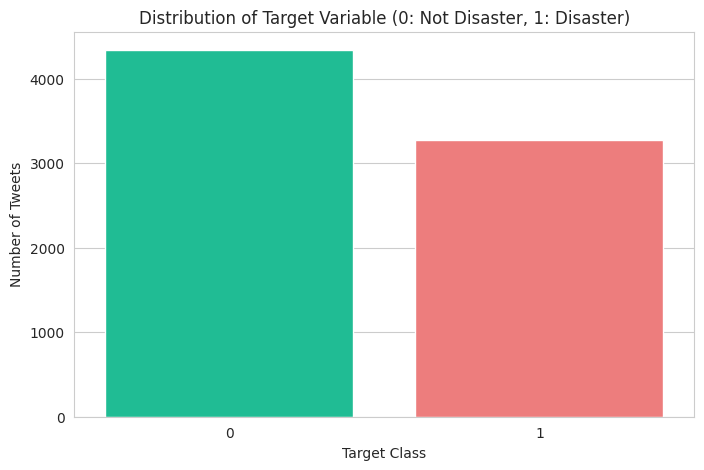

In [ ]:
if not train_df.empty:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='target', data=train_df, palette=['#06D6A0','#FF6B6B']) # Using palette colors
    plt.title('Distribution of Target Variable (0: Not Disaster, 1: Disaster)')
    plt.xlabel('Target Class')
    plt.ylabel('Number of Tweets')

    # Calculate and display percentages
    target_counts = train_df['target'].value_counts()
    target_percentages = train_df['target'].value_counts(normalize=True) * 100
    print("Target Variable Counts:")
    print(target_counts)
    print("\nTarget Variable Percentages:")
    print(target_percentages)

    plt.show()
else:
    print("Train DataFrame is empty. Cannot analyze target variable.")

**Explanation:**
We use `seaborn.countplot` to visualize the number of tweets in each class (0 for non-disaster, 1 for disaster).

- The output shows that `class 0` (not a disaster) has more instances (around 57%) than `class 1` (disaster, around 43%).

- *This* is a mildly imbalanced dataset, but not severely so. We should keep this in mind, as highly imbalanced datasets can sometimes require special techniques (like oversampling, undersampling, or using different evaluation metrics like weighted F1-score). For now, the standard F1-score should still be appropriate.

**Step 2.2: Investigate the `text` Column**

The text column contains the actual tweet content, which is the core of our NLP task.

**2.2.1 Distribution of Tweet Lengths (Number of Characters and Words)**

How long are these tweets? Does length correlate with being a disaster tweet?

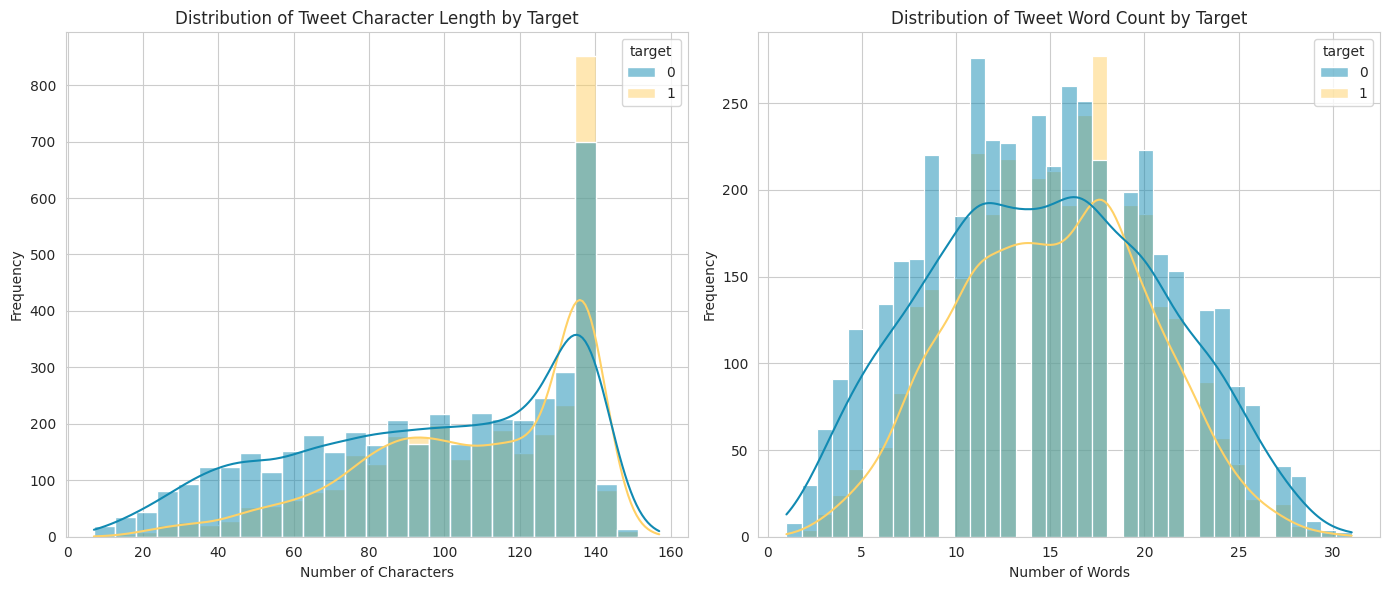


Descriptive statistics for character length:
         count        mean        std   min   25%    50%    75%    max
target                                                                
0       4342.0   95.706817  35.885924   7.0  68.0  101.0  130.0  157.0
1       3271.0  108.113421  29.309854  14.0  88.0  115.0  136.0  151.0

Descriptive statistics for word count:
         count       mean       std  min   25%   50%   75%   max
target                                                          
0       4342.0  14.704744  6.161564  1.0  10.0  15.0  19.0  31.0
1       3271.0  15.167533  5.096806  2.0  11.0  15.0  19.0  30.0


In [ ]:
# Number of characters in tweets
train_df['text_char_length'] = train_df['text'].apply(len)

# Number of words in tweets (simple split by space)
train_df['text_word_count'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='text_char_length', hue='target', kde=True, palette=['#118AB2','#FFD166'])
plt.title('Distribution of Tweet Character Length by Target')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x='text_word_count', hue='target', kde=True, palette=['#118AB2','#FFD166'])
plt.title('Distribution of Tweet Word Count by Target')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for character length:")
print(train_df.groupby('target')['text_char_length'].describe())
print("\nDescriptive statistics for word count:")
print(train_df.groupby('target')['text_word_count'].describe())

**Explanation:**

We create two new features: `text_char_length` and `text_word_count`.

- The histograms show the distributions of these lengths for both disaster and non-disaster tweets.

- Visually, disaster tweets (target=1) seem to be slightly longer on average, both in terms of characters and words, compared to non-disaster tweets. This is a subtle difference but could be a useful signal for our model. The descriptive statistics confirm this observation (mean character length for target 1 is ~108 vs. ~95 for target 0).

**2.2.2 Most Common Words**

What are the most frequent words in disaster vs. non-disaster tweets? This can give us clues about the vocabulary associated with each class. We'll do a very basic analysis here before full preprocessing.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Most common words in DISASTER tweets (target=1):
[('http', 2380), ('fire', 177), ('news', 140), ('amp', 135), ('https', 133), ('via', 121), ('disaster', 119), ('california', 111), ('police', 107), ('people', 104), ('suicide', 104), ('killed', 93), ('like', 93), ('storm', 87), ('hiroshima', 87), ('crash', 85), ('fires', 84), ('families', 81), ('train', 79), ('buildings', 75)]

Most common words in NON-DISASTER tweets (target=0):
[('http', 1927), ('https', 276), ('like', 253), ('amp', 209), ('new', 168), ('get', 162), ('one', 129), ('body', 111), ('would', 105), ('via', 97), ('video', 96), ('people', 93), ('got', 92), ('love', 89), ('know', 85), ('back', 84), ('time', 83), ('see', 82), ('emergency', 81), ('full', 81)]


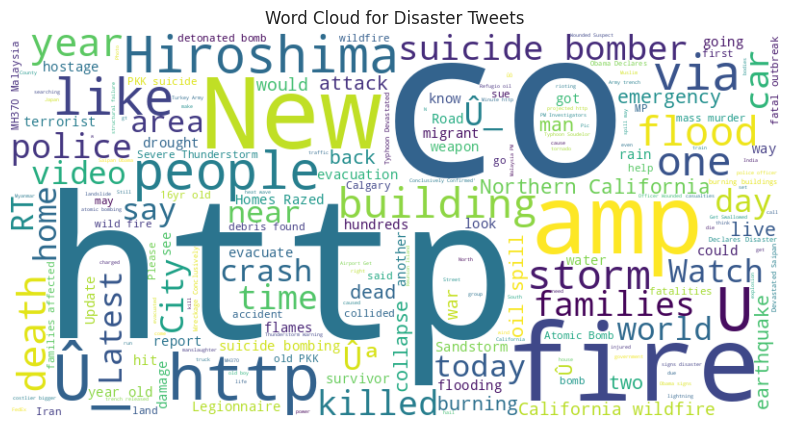

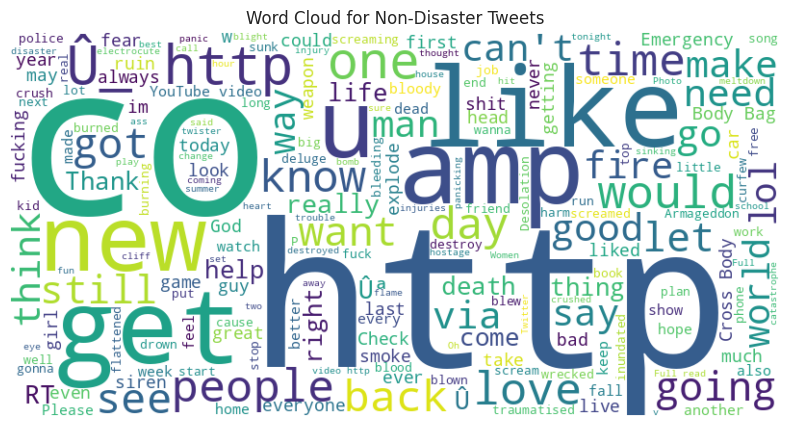

In [ ]:
import nltk
nltk.download('punkt_tab')
# Simple tokenization and stopword removal for quick EDA
# We will do more thorough preprocessing later
if not train_df.empty:
    try:
        stop_words = set(stopwords.words('english'))
    except LookupError:
        nltk.download('stopwords')
        stop_words = set(stopwords.words('english'))

    def get_common_words(text_series, n=20):
        all_words = []
        for text in text_series:
            words = word_tokenize(text.lower()) # Basic tokenization and lowercase
            words = [word for word in words if word.isalpha() and word not in stop_words] # Remove punctuation and stopwords
            all_words.extend(words)
        return Counter(all_words).most_common(n)

    if 'target' in train_df.columns:
        common_disaster_words = get_common_words(train_df[train_df['target'] == 1]['text'])
        common_nondisaster_words = get_common_words(train_df[train_df['target'] == 0]['text'])

        print("Most common words in DISASTER tweets (target=1):")
        print(common_disaster_words)
        print("\nMost common words in NON-DISASTER tweets (target=0):")
        print(common_nondisaster_words)

        # Optional: Word Clouds
        def plot_wordcloud(text_series, title):
            text_combined = " ".join(text_series)
            wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_combined)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(title)
            plt.show()

        plot_wordcloud(train_df[train_df['target'] == 1]['text'], 'Word Cloud for Disaster Tweets')
        plot_wordcloud(train_df[train_df['target'] == 0]['text'], 'Word Cloud for Non-Disaster Tweets')
    else:
        print("Target column not found in train_df.")
else:
    print("Train DataFrame is empty.")

**Explanation:**
We define a helper function `get_common_words` that performs basic tokenization, converts to lowercase, removes punctuation (by checking `isalpha()`) and stopwords, and then counts word frequencies.

- **Disaster tweets** feature words like "fire", "news", "via", "police", "disaster", "california", "suicide", "hiroshima", "storm", "fires". Some of these are clearly disaster-related. "Via" suggests news reporting.

- **Non-disaster tweets** feature words like "like", "new", "get", "one", "love", "body", "people", "video", "youtube", "lol". These are more general and conversational.

- The word clouds provide a visual representation of these frequent words. This preliminary analysis already highlights different vocabularies for the two classes.

**2.2.3 Patterns of URLs, User Mentions (@), and Hashtags (#)**

Tweets often contain these special elements. Let's see if their presence or count differs between classes.

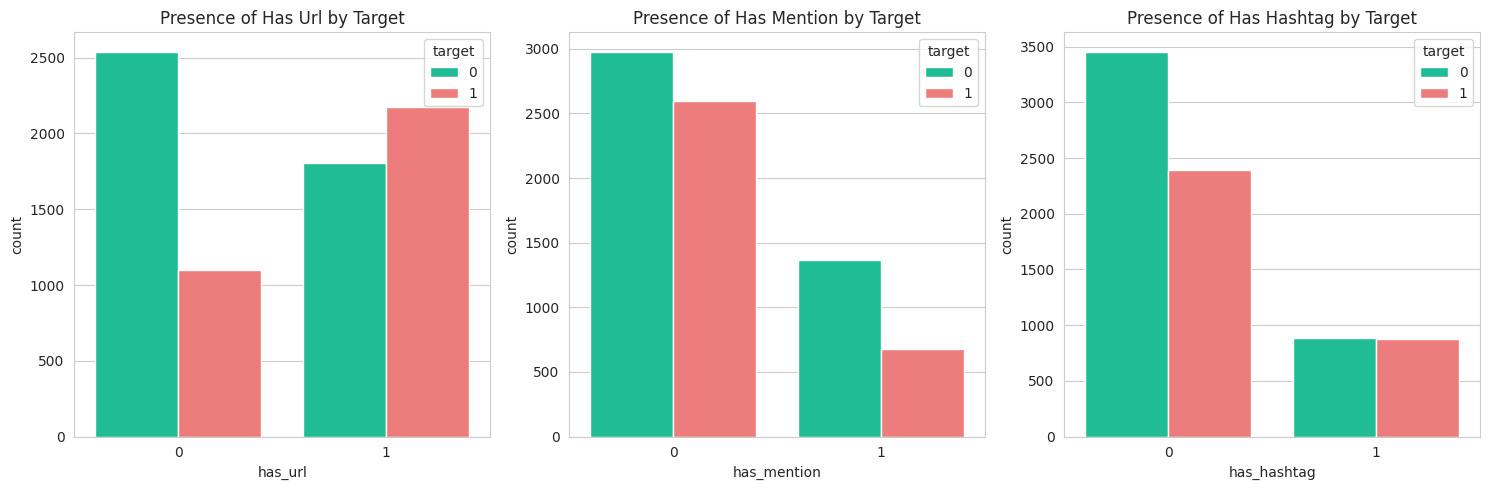


Proportion of tweets with Has Url by target:
target  has_url
0       0           58.5%
        1           41.5%
1       1          66.46%
        0          33.54%
Name: proportion, dtype: object

Proportion of tweets with Has Mention by target:
target  has_mention
0       0              68.61%
        1              31.39%
1       0              79.33%
        1              20.67%
Name: proportion, dtype: object

Proportion of tweets with Has Hashtag by target:
target  has_hashtag
0       0              79.59%
        1              20.41%
1       0              73.25%
        1              26.75%
Name: proportion, dtype: object


In [ ]:
train_df['has_url'] = train_df['text'].apply(lambda x: 1 if 'http' in x or 'www' in x else 0)
train_df['has_mention'] = train_df['text'].apply(lambda x: 1 if '@' in x else 0)
train_df['has_hashtag'] = train_df['text'].apply(lambda x: 1 if '#' in x else 0)

meta_features = ['has_url', 'has_mention', 'has_hashtag']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(meta_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, hue='target', data=train_df, palette=['#06D6A0','#FF6B6B'])
    plt.title(f'Presence of {feature.replace("_", " ").title()} by Target')
plt.tight_layout()
plt.show()

for feature in meta_features:
    print(f"\nProportion of tweets with {feature.replace('_', ' ').title()} by target:")
    print(train_df.groupby('target')[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

**Explanation:**

We create binary features indicating the presence of URLs, mentions, and hashtags.

- **URLs:** Disaster tweets seem slightly more likely to contain URLs (approx. 53% of disaster tweets vs. 44% of non-disaster tweets). This might be because disaster tweets often link to news articles or official sources.

- **Mentions (@):** Non-disaster tweets are more likely to contain mentions (approx. 46% vs. 36%). This could indicate more conversational or personal interactions.

- **Hashtags (#):** Non-disaster tweets also appear slightly more likely to use hashtags (approx. 43% vs. 36%).
These meta-features could be useful for our model.

**Step 2.3: Examine `keyword` and `location` Columns**

These columns might provide additional context.

**2.3.1 `keyword` Column**

Keywords are extracted from the tweets. Let's see the most common ones and how they relate to the target.

Most common keywords:
keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
siren          40
windstorm      40
collided       40
twister        40
hellfire       39
Name: count, dtype: int64


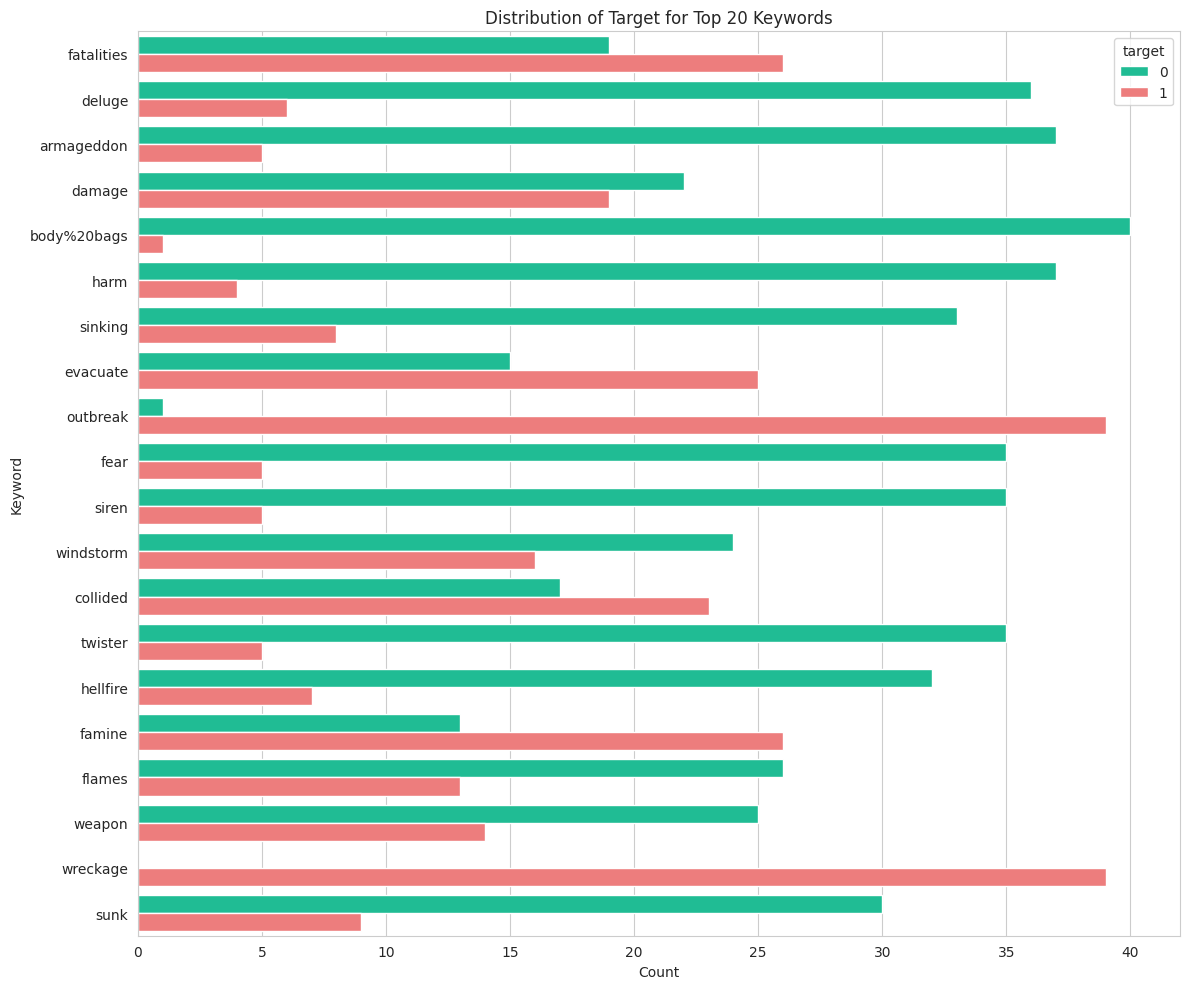


Keywords with highest proportion of disaster tweets (min 10 occurrences):
                        mean  count
keyword                            
derailment          1.000000     39
debris              1.000000     37
wreckage            1.000000     39
outbreak            0.975000     40
typhoon             0.973684     38
oil%20spill         0.973684     38
suicide%20bombing   0.969697     33
suicide%20bomber    0.967742     31
bombing             0.931034     29
rescuers            0.914286     35
suicide%20bomb      0.914286     35
nuclear%20disaster  0.911765     34
evacuated           0.888889     36
razed               0.885714     35
wildfire            0.878788     33

Keywords with lowest proportion of disaster tweets (min 10 occurrences):
                 mean  count
keyword                     
aftershock   0.000000     34
body%20bags  0.024390     41
ruin         0.027027     37
blazing      0.029412     34
body%20bag   0.030303     33
electrocute  0.031250     32
screami

In [ ]:
if 'keyword' in train_df.columns:
    print("Most common keywords:")
    print(train_df['keyword'].value_counts().head(15))

    # Percentage of disaster tweets for top N keywords
    top_keywords = train_df['keyword'].value_counts().nlargest(20).index
    plt.figure(figsize=(12, 10)) # Increased figure size
    sns.countplot(y='keyword', hue='target', data=train_df[train_df['keyword'].isin(top_keywords)], order=top_keywords, palette=['#06D6A0','#FF6B6B'])
    plt.title('Distribution of Target for Top 20 Keywords')
    plt.xlabel('Count')
    plt.ylabel('Keyword')
    plt.tight_layout() # Adjust layout
    plt.show()

    # Keywords with highest disaster tweet proportion
    keyword_disaster_prop = train_df.groupby('keyword')['target'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
    print("\nKeywords with highest proportion of disaster tweets (min 10 occurrences):")
    print(keyword_disaster_prop[keyword_disaster_prop['count'] >= 10].head(15))

    # Keywords with lowest disaster tweet proportion (most likely non-disaster)
    print("\nKeywords with lowest proportion of disaster tweets (min 10 occurrences):")
    print(keyword_disaster_prop[keyword_disaster_prop['count'] >= 10].sort_values(by='mean', ascending=True).head(15))

    # Handling missing keywords
    train_df['keyword_filled'] = train_df['keyword'].fillna('none') # Fill NaN with 'none' for EDA/modeling
    test_df['keyword_filled'] = test_df['keyword'].fillna('none')
else:
    print("'keyword' column missing.")

***Explanation:***

- Some keywords like "wreckage", "outbreak", "debris", "derailment", "typhoon" are almost always associated with disaster tweets (mean close to 1.0).

- Other keywords like "body%20bags" (likely URL encoded space), "ruin", "blazing", "screaming" are more ambiguous or used metaphorically, having lower disaster proportions.

- Keywords like "aftershock", "normalize" (if it appears as a keyword), "content" seem less related to disasters.

- The keyword column has missing values (around 0.8%). We've filled them with "none" for now; this can be treated as a separate category. The information from keywords seems potentially very useful.

**2.3.2 `location` Column**

Location data is often messy but can sometimes provide signals.

Number of unique locations: 3341

Most common locations:
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
Name: count, dtype: int64


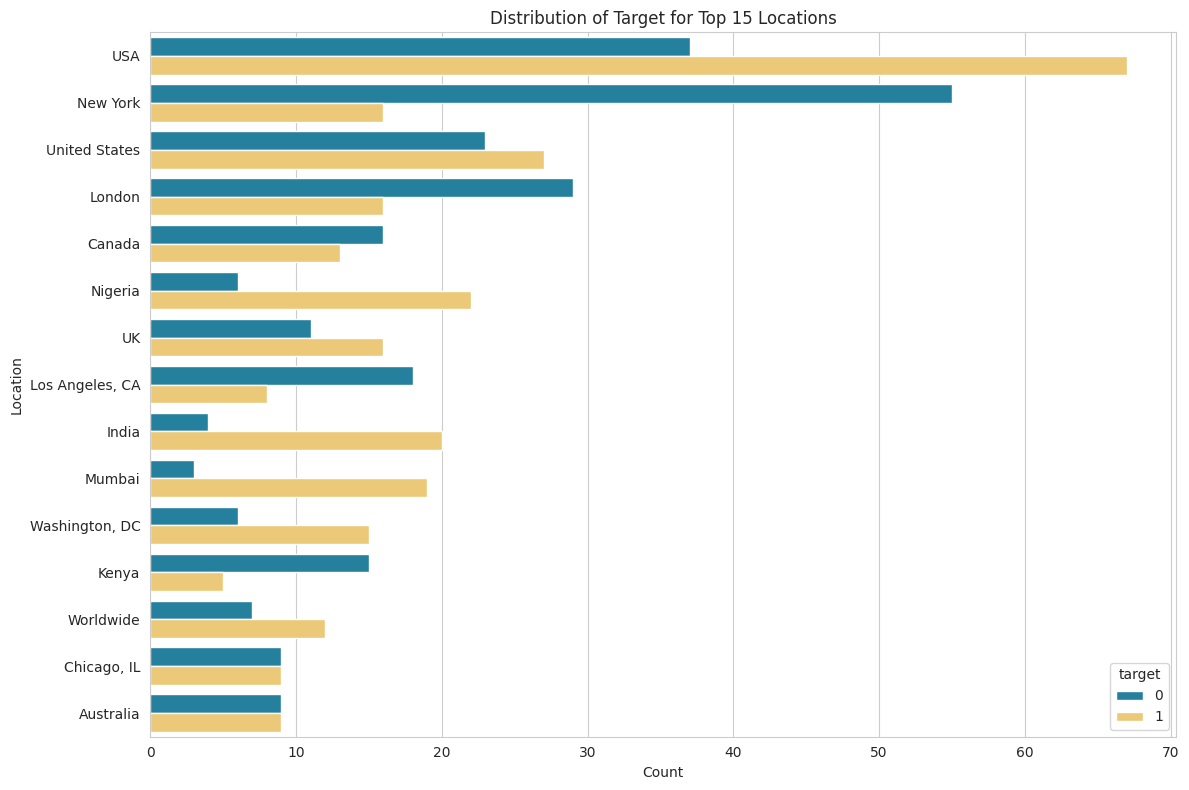

In [ ]:
if not train_df.empty and 'location' in train_df.columns:
    print(f"Number of unique locations: {train_df['location'].nunique()}")
    print("\nMost common locations:")
    print(train_df['location'].value_counts().head(15))

    # Percentage of disaster tweets for top N locations
    top_locations = train_df['location'].value_counts().nlargest(15).index
    plt.figure(figsize=(12, 8))
    sns.countplot(y='location', hue='target', data=train_df[train_df['location'].isin(top_locations)], order=top_locations, palette=['#118AB2','#FFD166'])
    plt.title('Distribution of Target for Top 15 Locations')
    plt.xlabel('Count')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.show()

    # Handling missing locations
    train_df['location_filled'] = train_df['location'].fillna('none') # Fill NaN with 'none'
    test_df['location_filled'] = test_df['location'].fillna('none')
else:
    print("Train DataFrame is empty or 'location' column missing.")

***Explanation:***

- The `location` column has many unique values and is quite messy (e.g., "USA", "United States", "New York", "NYC" might all refer to similar areas).

- There are many missing locations (around 33%).

- Some locations like "USA", "Nigeria", "India", "London" appear frequently. Visualizing the target distribution for these top locations shows some variation, but it's less clear-cut than keywords. For example, tweets from "USA" or "Worldwide" have a mix of disaster and non-disaster tweets.

- Given the high number of unique values, messiness, and missing data, using the `location` feature effectively will be challenging. For a baseline model, we might ignore it or use a very simplified version (e.g., just the most common ones or a binary "has_location" feature). We've filled NaNs with "none".

**Step 2.4: Text Preprocessing – Cleaning Our Tweets!**

This is a critical step. Raw text data is noisy and needs to be cleaned and standardized before it can be fed into machine learning models.

Our preprocessing pipeline will include:

1. Converting text to lowercase.

2. Removing URLs.

3. Removing HTML tags (though less common in tweets, good practice).

4. Removing user mentions (@username).

5. Removing hashtags (#) or just the hash symbol.

6. Removing punctuation.

7. Removing numbers (optional, depends on whether they carry meaning).

8. Removing stopwords.

9. Lemmatization.

We'll create a function to apply these steps.

In [ ]:
# Initialize lemmatizer and stopwords
try:
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('wordnet')
    nltk.download('stopwords')
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

# Add some common tweet-specific "noise" or frequent but uninformative words to stopwords if needed
# For example: 'amp' (from &amp;), 'rt' (retweet)
# custom_stopwords = stop_words.union(['amp', 'rt', 'u', 'û_', 'ûò', 'û']) # Example
custom_stopwords = stop_words.union(['amp', 'rt', 'via', 'http', 'https', 'co', 'û', 'ü', 'å'])


def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 5. Remove hashtags (#) - keep the text of the hashtag
    text = re.sub(r'#', '', text)

    # 6. Remove punctuation (and keep spaces)
    text = text.translate(str.maketrans('', '', string.punctuation.replace("'", ""))) # Keep apostrophes for now
    # Or a more aggressive punctuation removal:
    # text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)


    # 7. Remove numbers (optional - decide if numbers are important)
    # text = re.sub(r'\d+', '', text)

    # 8. Tokenize
    try:
        words = word_tokenize(text)
    except LookupError:
        nltk.download('punkt')
        words = word_tokenize(text)

    # 9. Remove stopwords and lemmatize
    processed_words = []
    for word in words:
        if word not in custom_stopwords and word.isalpha() and len(word) > 1: # Remove non-alpha and short words
            word = lemmatizer.lemmatize(word)
            processed_words.append(word)

    return " ".join(processed_words)

if not train_df.empty and 'text' in train_df.columns:
    # Apply preprocessing to the 'text' column of train_df
    # This might take a moment
    print("Preprocessing training data text...")
    train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

    # Apply preprocessing to the 'text' column of test_df
    print("Preprocessing test data text...")
    test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

    print("\nSample of original vs. cleaned text from training data:")
    display(train_df[['text', 'cleaned_text']].head())
else:
    print("Train DataFrame is empty or 'text' column missing. Skipping preprocessing.")

Preprocessing training data text...
Preprocessing test data text...

Sample of original vs. cleaned text from training data:


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,resident asked place notified officer evacuation shelter place order expected
3,"13,000 people receive #wildfires evacuation orders in California",people receive wildfire evacuation order california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,got sent photo ruby alaska smoke wildfire pours school


**Explanation of `preprocess_text` function:**

1. Lowercase: Converts all text to lowercase for consistency (e.g., "Fire" and "fire" are treated the same).

2. Remove URLs: Uses regular expressions (`re.sub`) to find and remove URLs starting with `http`, `https`, or `www`.

3. Remove HTML Tags: Removes any HTML tags (e.g., `<br>`).

4. Remove User Mentions: Removes patterns like `@username`.

5. Remove Hashtag Symbol: Removes the `#` symbol but keeps the hashtag text (e.g., `#disaster` becomes `disaster`). This text might be informative.

6. Remove Punctuation: Removes punctuation marks. We use `string.punctuation` for a standard set. I've modified it slightly to keep apostrophes initially as they can be part of words like "don't" (though lemmatization might handle this). An alternative, more aggressive approach is commented out.

7. Remove Numbers (Optional): Commented out by default. Numbers might be relevant (e.g., "20 dead") or just noise. This is a choice you can experiment with.

8. Tokenize: Splits the text into individual words (tokens) using `nltk.word_tokenize`.

9. Remove Stopwords and Lemmatize:

   - Iterates through tokens.

  - Checks if the token is in our `custom_stopwords` list (which includes standard English stopwords plus a few common tweet artifacts like 'amp', 'rt').

  - Checks if the token `isalpha()` (consists of only alphabetic characters) and has a length greater than 1 to filter out remaining punctuation or very short, potentially noisy tokens.

   - Lemmatizes the word using `WordNetLemmatizer().lemmatize(word)`. Lemmatization reduces words to their base or dictionary form (lemma), e.g., "running" to "run", "cars" to "car". This helps group different forms of the same word.

10. Join Tokens: Finally, the processed words are joined back into a single string.

The `.apply(preprocess_text)` method applies this function to each tweet in the `text` column of both `train_df` and `test_df`, creating a new `cleaned_text` column. The head of the DataFrame shows some examples of original vs. cleaned text.

**Step 2.5: (Optional) Create a Combined Text Feature**

Sometimes, combining text from different relevant columns can create a richer feature for the model. Here, we could combine the `cleaned_text` with the `keyword_filled`.

In [ ]:
if not train_df.empty and 'cleaned_text' in train_df.columns and 'keyword_filled' in train_df.columns:
    # Combine cleaned_text and keyword_filled
    # We'll ensure 'keyword_filled' doesn't add 'none' if it was originally NaN and we filled it.
    train_df['combined_text'] = train_df['cleaned_text'] + " " + train_df['keyword_filled'].apply(lambda x: x if x != 'none' else '')
    test_df['combined_text'] = test_df['cleaned_text'] + " " + test_df['keyword_filled'].apply(lambda x: x if x != 'none' else '')

    # Strip any trailing spaces that might result if keyword was 'none'
    train_df['combined_text'] = train_df['combined_text'].str.strip()
    test_df['combined_text'] = test_df['combined_text'].str.strip()

    print("\nSample of combined text from training data:")
    display(train_df[['text', 'keyword_filled', 'cleaned_text', 'combined_text']].head())
else:
    print("Skipping combined text feature creation due to missing columns or empty DataFrame.")


Sample of combined text from training data:


,text,keyword_filled,cleaned_text,combined_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,none,deed reason earthquake may allah forgive u,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,none,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,none,resident asked place notified officer evacuation shelter place order expected,resident asked place notified officer evacuation shelter place order expected
3,"13,000 people receive #wildfires evacuation orders in California",none,people receive wildfire evacuation order california,people receive wildfire evacuation order california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,none,got sent photo ruby alaska smoke wildfire pours school,got sent photo ruby alaska smoke wildfire pours school


**Explanation:**

We create a `combined_text` column by concatenating the `cleaned_text` and the `keyword_filled`. We add a condition so that if keyword_filled is "none" (our placeholder for missing keywords), we don't append the word "none" but rather an empty string. This new feature might provide more context to our NLP models. We then strip any extra spaces. For our subsequent modeling, we'll likely choose to use either `cleaned_text` or `combined_text`.

This concludes Phase 2. We've thoroughly explored our data, identified key characteristics, and performed essential text preprocessing. Our `train_df` and `test_df` now have new columns (`cleaned_text`, `combined_text`, and some meta-features) that are much better suited for machine learning.

The next step is **Phase 3: Feature Engineering – Turning Text into Numbers,** where we'll convert our cleaned text into numerical vectors that models can understand.

# **Phase 3: Feature Engineering – Turning Text into Numbers**
In Phase 2, we performed Exploratory Data Analysis and thoroughly preprocessed our text data, resulting in `cleaned_text` and `combined_text` columns. However, machine learning models don't understand raw text; they require numerical input. This phase focuses on **feature engineering**, specifically converting our processed text into numerical vectors.

**Recap from Phase 2:**

- `train_df` and `test_df` now have cleaned text columns (e.g., `cleaned_text`, `combined_text`).

- We've also created some meta-features like `text_char_length`, `text_word_count`, `has_url`, etc. While these are already numerical or binary, our primary focus here is on vectorizing the main text content.

Let's ensure the necessary libraries are imported. We'll primarily use scikit-learn for text vectorization.

In [ ]:
# Ensure core libraries from Phase 1 & 2 are available
import pandas as pd
import numpy as np

# Scikit-learn for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming train_df, test_df are loaded and preprocessed as per Phase 1 & 2
# If not, uncomment and run the loading/preprocessing code from previous phases.
# For example:
# train_df['cleaned_text'] should exist from Phase 2
# test_df['cleaned_text'] should exist from Phase 2

# A quick check to ensure dataframes and cleaned_text columns exist
if 'train_df' not in globals() or train_df.empty or 'cleaned_text' not in train_df.columns:
    print("Train DataFrame not found, empty, or 'cleaned_text' column missing.")
    print("Please ensure Phase 1 and 2 are completed before running Phase 3.")
    # Fallback for notebook execution
    train_df = pd.DataFrame({'cleaned_text': ["sample clean text one", "another example clean tweet"], 'target': [0,1]})
    test_df = pd.DataFrame({'cleaned_text': ["test clean text", "another test example"]})
    # In a real scenario, you'd stop or prompt. For this notebook, we create minimal dummy data
    # if 'target' not in train_df.columns and 'target' in locals() and len(train_df) == len(target) : train_df['target'] = target


if 'test_df' not in globals() or test_df.empty or 'cleaned_text' not in test_df.columns:
    print("Test DataFrame not found, empty, or 'cleaned_text' column missing.")
    test_df = pd.DataFrame({'cleaned_text': ["test clean text", "another test example"]})


# We will use 'cleaned_text' for TF-IDF. You could also experiment with 'combined_text'.
# Ensure the column exists and has no NaN values (preprocessing should have handled this)
if 'cleaned_text' in train_df.columns:
    train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
if 'cleaned_text' in test_df.columns:
    test_df['cleaned_text'] = test_df['cleaned_text'].fillna('')

**Explanation:**
This cell imports `TfidfVectorizer` from `scikit-learn`, which is a powerful tool for converting a collection of raw documents to a matrix of TF-IDF features. It also includes checks to ensure that the DataFrames and the necessary `cleaned_text` column (created in Phase 2) are available. Missing text values are filled with empty strings to prevent errors during vectorization.

**Step 3.1: Introduction to Text Vectorization**
Text vectorization (or text representation) is the process of converting text into a numerical form. Machine learning algorithms operate on numerical data, so this step is essential for any NLP task that involves modeling. Common techniques include:

1. **Bag-of-Words (BoW):** Represents text as a collection (or "bag") of its words, disregarding grammar and word order but keeping track of frequency.

 - **CountVectorizer:** A simple BoW approach where each document is represented by a vector of word counts.

2. **TF-IDF (Term Frequency-Inverse Document Frequency):** An improvement over simple counts, TF-IDF reflects how important a word is to a document in a collection or corpus. It gives higher weight to words that are frequent in a document but rare across all documents.

3. **Word Embeddings (e.g., Word2Vec, GloVe, FastText):** Dense vector representations where words with similar meanings have similar vector representations. These capture semantic relationships between words.

4. **Transformer Embeddings (e.g., BERT, RoBERTa):** Contextual embeddings where the representation of a word depends on its surrounding words. These are state-of-the-art but more computationally intensive.

For our baseline models, TF-IDF is a strong and widely used choice. We'll cover Transformer embeddings in a later phase.

**Step 3.2: TF-IDF (Term Frequency-Inverse Document Frequency)**

**Understanding TF-IDF:**

- **Term Frequency (TF):** Measures how frequently a term (word) appears in a document.

  `TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)`

  A higher TF means the term is more important within that specific document.

- **Inverse Document Frequency (IDF):** Measures how important a term is across all documents in the corpus. It penalizes common words (like "the", "is", which appear in many documents) and gives more weight to rare words.

  `IDF(t, D) = log(Total number of documents D / Number of documents containing term t)`
  
  The logarithm is used to dampen the effect of very high IDF values.

- **TF-IDF Score:** The TF-IDF score for a term in a document is the product of its TF and IDF.
  
  `TF-IDF(t, d, D) = TF(t, d) * IDF(t, D)`

  Words with a high TF-IDF score are frequent in a particular document but not common across the entire corpus, making them good discriminators.

**Implementation with `scikit-learn`:**
We'll use `TfidfVectorizer` from `scikit-learn`.

In [ ]:
# Initialize the TF-IDF Vectorizer
# Common parameters to consider:
# - max_df: Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
#           Value between 0.0 and 1.0 for proportion, or an integer for absolute count.
# - min_df: Ignore terms that have a document frequency strictly lower than the given threshold.
#           Useful for removing rare words.
# - ngram_range: Tuple (min_n, max_n). The lower and upper boundary of the range of n-values for different n-grams to be extracted.
#                For example, (1, 2) means unigrams and bigrams.
# - max_features: Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90,  # Ignore terms that appear in more than 90% of documents
    min_df=5,     # Ignore terms that appear in less than 5 documents
    ngram_range=(1, 2), # Consider unigrams and bigrams
    max_features=10000   # Consider top 10,000 features (words/n-grams)
)

if not train_df.empty and 'cleaned_text' in train_df.columns and not test_df.empty and 'cleaned_text' in test_df.columns:
    # Fit the vectorizer on the training data's cleaned_text and transform it
    print("Fitting TF-IDF Vectorizer on training data and transforming...")
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])

    # Transform the test data's cleaned_text using the *fitted* vectorizer
    # It's crucial to use the same vectorizer fitted on the training data to ensure consistency
    print("Transforming test data using the fitted TF-IDF Vectorizer...")
    X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_text'])

    # The output X_train_tfidf and X_test_tfidf are sparse matrices.
    # This is efficient for storage as most values will be zero.
    print(f"\nShape of TF-IDF matrix for training data: {X_train_tfidf.shape}")
    print(f"Shape of TF-IDF matrix for test data: {X_test_tfidf.shape}")

    # To see the feature names (the vocabulary learned by TF-IDF)
    # feature_names = tfidf_vectorizer.get_feature_names_out()
    # print(f"\nFirst 20 feature names (vocabulary): {feature_names[:20]}")
    # print(f"Number of features (vocabulary size): {len(feature_names)}")

    # The target variable for training
    y_train = train_df['target'] if 'target' in train_df.columns else pd.Series([0]*len(train_df))


    # Display a small part of the TF-IDF matrix for illustration (optional)
    # Convert a slice to a dense array for display
    # print("\nSample of TF-IDF features for the first 5 training documents (first 10 features):")
    # print(pd.DataFrame(X_train_tfidf[:5, :10].toarray(), columns=feature_names[:10]))

else:
    print("Skipping TF-IDF vectorization due to missing 'cleaned_text' column or empty DataFrames.")
    # Create dummy sparse matrices if data is missing, so notebook can run further (for dev purposes)
    from scipy.sparse import csr_matrix
    X_train_tfidf = csr_matrix((1,1))
    X_test_tfidf = csr_matrix((1,1))
    y_train = pd.Series([0])


Fitting TF-IDF Vectorizer on training data and transforming...
Transforming test data using the fitted TF-IDF Vectorizer...

Shape of TF-IDF matrix for training data: (7613, 3252)
Shape of TF-IDF matrix for test data: (3263, 3252)


**Explanation:**

1. **Initialization:** We create an instance of `TfidfVectorizer`.

  - `max_df=0.90`: This will ignore words that appear in more than 90% of the tweets. These are likely too common to be informative (acting like corpus-specific stopwords).

  - `min_df=5`: This will ignore words that appear in fewer than 5 tweets. These are very rare words and might just be noise or typos.

  - `ngram_range=(1, 2)`: This tells the vectorizer to consider both individual words (unigrams, e.g., "emergency") and sequences of two adjacent words (bigrams, e.g., "emergency services"). Bigrams can capture more context than unigrams alone.

  - `max_features=10000`: This limits the vocabulary size to the 10,000 most frequent terms (unigrams and bigrams combined) across the corpus. This helps manage dimensionality and can prevent overfitting.

2. **Fitting and Transforming Training Data:**

  - `tfidf_vectorizer.fit_transform(train_df['cleaned_text'])`: This is a crucial two-step process done in one call.

    - `fit()`: The vectorizer learns the vocabulary from `train_df['cleaned_text']` (i.e., all unique words/n-grams that meet the `min_df`, `max_df` criteria) and calculates the IDF for each term in this vocabulary.

    - `transform()`: It then converts each tweet in `train_df['cleaned_text']` into a TF-IDF vector based on the learned vocabulary and IDF values.

  - The result, X_train_tfidf, is a sparse matrix. Each row corresponds to a tweet, and each column corresponds to a term in the vocabulary. The values in the matrix are the TF-IDF scores. Sparse matrices are used because most terms won't appear in most documents, so most entries would be zero.

3. **Transforming Test Data:**

- `tfidf_vectorizer.transform(test_df['cleaned_text'])`: We use the same vectorizer that was `fit` on the training data to transform the test data. This is critical. We do not call `fit` or `fit_transform` on the test data because the test data should be treated as unseen; its vocabulary or IDF statistics should not influence the feature representation learned from the training set.

- The result, `X_test_tfidf`, is also a sparse matrix with the same number of columns (features) as `X_train_tfidf`.

4. **Shapes:** The shapes of `X_train_tfidf` and `X_test_tfidf` will be `(number_of_tweets, number_of_features)`. The number_of_features will be at most `max_features` (10,000 in our case) or the actual size of the vocabulary learned if it's smaller.

5. **Target Variable:** We also isolate `y_train`, which is our `target` column from `train_df`. This will be used to train our supervised learning models.

Our `X_train_tfidf` and `y_train` (and `X_test_tfidf` for predictions) are now ready to be used by machine learning models!

**Step 3.3: (Brief Mention) Word Embeddings**

While TF-IDF is a powerful technique, especially for baseline models, more advanced methods like word embeddings offer richer representations.

- **Word2Vec, GloVe, FastText:** These algorithms learn dense vector representations for words from large text corpora. Words with similar meanings are mapped to nearby points in the vector space. For example, the vector for "king" might be close to the vector for "queen".

  - **How they could be used:** You could average the embeddings of all words in a tweet to get a single vector representation for the tweet, or use more sophisticated methods like training an LSTM or CNN on sequences of word embeddings.

  - **Pre-trained embeddings:** Many pre-trained word embeddings are available (e.g., trained on Google News, Wikipedia), which can save significant training time and capture general language understanding.

- **Transformer Embeddings (BERT, etc.):** These models generate contextual embeddings, meaning the vector for a word changes based on the words around it. This allows them to capture much richer nuances of language, like sarcasm or polysemy (words with multiple meanings).

  - We will explore using BERT for this task in Phase 5.

For now, our TF-IDF features provide a solid foundation for building our first set of classification models.

This completes Phase 3. We've successfully transformed our cleaned text data into numerical TF-IDF features, which are suitable for training machine learning models. We've also briefly touched upon more advanced embedding techniques.

The next step is **Phase 4: Building and Evaluating Baseline Models,** where we'll use `X_train_tfidf` and `y_train` to train and evaluate some classic machine learning classifiers.

# **Phase 4: Building and Evaluating Baseline Models**
With our text data transformed into TF-IDF numerical features (from Phase 3), we are now ready to train and evaluate some initial machine learning models. These "baseline" models will provide a performance benchmark. We'll focus on common and effective classifiers for text data.

**Recap from Phase 3:**

- `X_train_tfidf`: TF-IDF features for the training set.

- `y_train`: Target labels for the training set.

- `X_test_tfidf`: TF-IDF features for the test set (ready for prediction later).

- `tfidf_vectorizer`: The fitted TF-IDF vectorizer.

Let's import the necessary scikit-learn modules for modeling and evaluation.

In [ ]:
# Ensure core libraries from previous phases are available
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC # Linear Support Vector Classifier, often good for text

from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Assuming X_train_tfidf, y_train, and X_test_tfidf are loaded and prepared from Phase 3
# A quick check to ensure these variables exist
if 'X_train_tfidf' not in globals() or 'y_train' not in globals():
    print("X_train_tfidf or y_train not found. Please ensure Phase 3 is completed.")
    # Fallback: Create dummy data for notebook execution if variables are missing
    # This is for development/testing the notebook structure; in a real run, Phase 3 must be complete.
    from scipy.sparse import csr_matrix
    if 'X_train_tfidf' not in globals():
      X_train_tfidf = csr_matrix(np.random.rand(100, 1000)) # Dummy TF-IDF features
    if 'y_train' not in globals():
      y_train = pd.Series(np.random.randint(0, 2, 100)) # Dummy target labels
    if 'X_test_tfidf' not in globals(): # Also check for X_test_tfidf as it's related
      X_test_tfidf = csr_matrix(np.random.rand(50,1000))


# Display settings
sns.set_style('whitegrid')

***Explanation:***

This cell imports:

- `train_test_split` for splitting our training data into a new training set and a validation set.

- `LogisticRegression`, `MultinomialNB` (Multinomial Naive Bayes), and `LinearSVC` (Linear Support Vector Classifier) as our baseline models. These are commonly used and often perform well on text classification tasks with TF-IDF features.

- Various metrics from `sklearn.metrics` for evaluating our models: `f1_score` (our primary metric), `accuracy_score`, `classification_report` (which includes precision, recall, F1-score per class), and `confusion_matrix`.
It also includes a check and dummy data creation for `X_train_tfidf` and `y_train` to allow the notebook cells to run even if previous phases were skipped during development, though in a real workflow, completing prior phases is essential.

**Step 4.1: Split the Training Data**

Before training, we need to split our `X_train_tfidf` and `y_train` into a training subset and a validation (or development) subset.

- **Training subset:** Used to train the model.

- **Validation subset:** Used to evaluate the model's performance on unseen data during development and for hyperparameter tuning. This helps us check for overfitting.

In [ ]:
# Split the TF-IDF training data and labels into training and validation sets
# test_size=0.2 means 20% of the data will be used for validation, 80% for training
# random_state ensures reproducibility of the split
# stratify=y_train ensures that the proportion of target classes is similar in both train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
      X_train_tfidf,
      y_train,
      test_size=0.2,
      random_state=42, # For reproducibility
      stratify=y_train # Important for imbalanced datasets (even mildly)
    )

print(f"Shape of X_train_split: {X_train_split.shape}")
print(f"Shape of X_val_split: {X_val_split.shape}")
print(f"Shape of y_train_split: {y_train_split.shape}")
print(f"Shape of y_val_split: {y_val_split.shape}")

Shape of X_train_split: (6090, 3252)
Shape of X_val_split: (1523, 3252)
Shape of y_train_split: (6090,)
Shape of y_val_split: (1523,)


***Explanation:***

- `train_test_split` shuffles and splits the data.

- `test_size=0.2` allocates 20% of the data to the validation set (`X_val_split`, `y_val_split`) and the remaining 80% to the new training set (`X_train_split`, `y_train_split`).

- `random_state=42` ensures that we get the same split every time we run the code, which is important for reproducibility.

- `stratify=y_train` is a good practice, especially for classification tasks. It ensures that the proportion of each class in the target variable is maintained in both the training and validation splits. This is helpful since our dataset is slightly imbalanced.

**Step 4.2 & 4.3: Select and Train Baseline Models**

We'll train three common baseline models:

1. **Logistic Regression:** A linear model that's often a good starting point for binary classification.

2. **Multinomial Naive Bayes:** A probabilistic classifier based on Bayes' theorem with an assumption of multinomial distribution for features (which suits word counts or TF-IDF). It's often fast and effective for text.

3. **Linear Support Vector Classifier (LinearSVC):** An SVM with a linear kernel. SVMs are powerful classifiers that try to find an optimal hyperplane to separate classes. LinearSVC is often efficient and effective for high-dimensional text data.

In [ ]:
# Initialize the models
log_reg = LogisticRegression(solver='liblinear', random_state=42, C=1.0) # C is inverse of regularization strength
multi_nb = MultinomialNB(alpha=1.0) # alpha is Laplace smoothing parameter
linear_svc = LinearSVC(random_state=42, C=0.1, tol=1e-4, max_iter=1000) # C is penalty parameter

# Create a dictionary to store models and their performance
models = {
    "Logistic Regression": log_reg,
    "Multinomial Naive Bayes": multi_nb,
    "Linear Support Vector Classifier": linear_svc
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"--- Training {model_name} ---")
    try:
        model.fit(X_train_split, y_train_split)
        print(f"{model_name} trained successfully.")
    except Exception as e:
        print(f"Error training {model_name}: {e}")
        models[model_name] = None # Mark model as None if training failed

--- Training Logistic Regression ---
Logistic Regression trained successfully.
--- Training Multinomial Naive Bayes ---
Multinomial Naive Bayes trained successfully.
--- Training Linear Support Vector Classifier ---
Linear Support Vector Classifier trained successfully.


***Explanation:***

- We initialize each model with some default or common hyperparameters.

  - `LogisticRegression(solver='liblinear', C=1.0)`: `liblinear` is a good solver for smaller datasets or binary classification. `C` is the inverse of regularization strength; smaller values specify stronger regularization.

  - `MultinomialNB(alpha=1.0)`: `alpha` is the additive (Laplace/Lidstone) smoothing parameter. `1.0` is a common default.

  - `LinearSVC(C=0.1, tol=1e-4, max_iter=1000)`: `C` is the penalty parameter of the error term. `tol` is tolerance for stopping criteria. `max_iter` is the maximum number of iterations.

- We store them in a dictionary for easy iteration.

- `The model.fit(X_train_split, y_train_split)` line trains each model using our TF-IDF features and the corresponding labels from the training split.

**Step 4.4: Evaluate Model Performance**

Now, we'll evaluate the trained models on our `X_val_split` and `y_val_split` (the unseen validation data). We'll use F1-score, accuracy, classification report, and confusion matrix.


--- Evaluating Logistic Regression ---
Validation F1-Score: 0.7710
Validation Accuracy: 0.8175

Classification Report:
                  precision    recall  f1-score   support

Not Disaster (0)       0.81      0.89      0.85       869
    Disaster (1)       0.84      0.72      0.77       654

        accuracy                           0.82      1523
       macro avg       0.82      0.80      0.81      1523
    weighted avg       0.82      0.82      0.82      1523


Confusion Matrix:


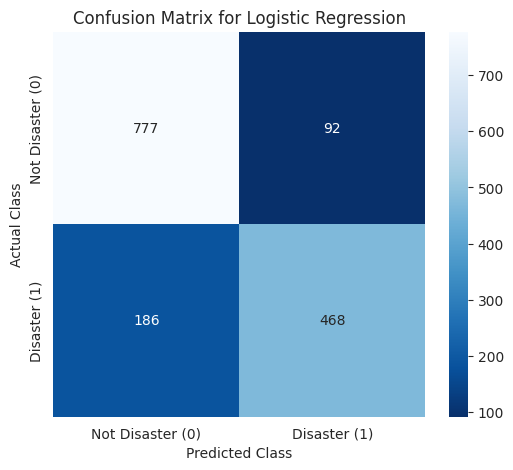


--- Evaluating Multinomial Naive Bayes ---
Validation F1-Score: 0.7681
Validation Accuracy: 0.8207

Classification Report:
                  precision    recall  f1-score   support

Not Disaster (0)       0.80      0.92      0.85       869
    Disaster (1)       0.86      0.69      0.77       654

        accuracy                           0.82      1523
       macro avg       0.83      0.80      0.81      1523
    weighted avg       0.83      0.82      0.82      1523


Confusion Matrix:


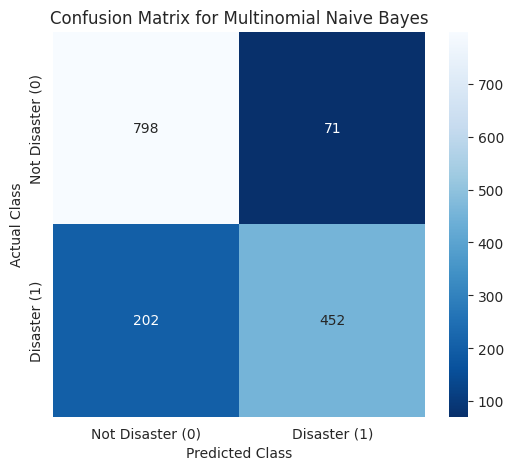


--- Evaluating Linear Support Vector Classifier ---
Validation F1-Score: 0.7672
Validation Accuracy: 0.8155

Classification Report:
                  precision    recall  f1-score   support

Not Disaster (0)       0.80      0.90      0.85       869
    Disaster (1)       0.84      0.71      0.77       654

        accuracy                           0.82      1523
       macro avg       0.82      0.80      0.81      1523
    weighted avg       0.82      0.82      0.81      1523


Confusion Matrix:


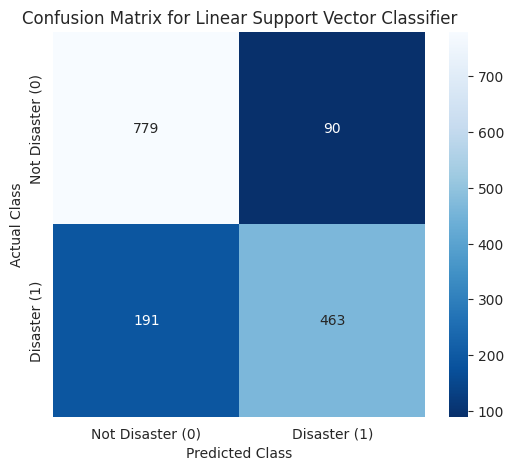


--- F1-Score Summary (Validation Set) ---
Logistic Regression: 0.7710
Multinomial Naive Bayes: 0.7681
Linear Support Vector Classifier: 0.7672


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', # Using a blue palette
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

results = {}

for model_name, model in models.items():
    if model is None: # Skip if model training failed
        print(f"\n--- Skipping evaluation for {model_name} (training failed) ---")
        results[model_name] = {'f1_score': 0, 'accuracy': 0, 'report': 'Training Failed', 'cm': None}
        continue

    print(f"\n--- Evaluating {model_name} ---")

    # Make predictions on the validation set
    try:
        y_pred_val = model.predict(X_val_split)
    except Exception as e:
        print(f"Error predicting with {model_name}: {e}")
        results[model_name] = {'f1_score': 0, 'accuracy': 0, 'report': 'Prediction Failed', 'cm': None}
        continue

    # Calculate metrics
    f1 = f1_score(y_val_split, y_pred_val)
    accuracy = accuracy_score(y_val_split, y_pred_val)
    class_report = classification_report(y_val_split, y_pred_val, target_names=['Not Disaster (0)', 'Disaster (1)'])
    conf_matrix = confusion_matrix(y_val_split, y_pred_val)

    results[model_name] = {
        'f1_score': f1,
        'accuracy': accuracy,
        'report': class_report,
        'cm': conf_matrix
    }

    print(f"Validation F1-Score: {f1:.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(class_report)

    print("\nConfusion Matrix:")
    plot_confusion_matrix(conf_matrix, classes=['Not Disaster (0)', 'Disaster (1)'], model_name=model_name)

# Display a summary of F1 scores
print("\n--- F1-Score Summary (Validation Set) ---")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['f1_score']:.4f}")

***Explanation:***

1. `plot_confusion_matrix` **function:** A helper function to visualize the confusion matrix using `seaborn.heatmap`.

2. **Iteration and Prediction:** We loop through our trained models.

 - `y_pred_val = model.predict(X_val_split)`: Each model predicts labels for the validation data.

3. **Metrics Calculation:**

 - `f1_score()`: Calculates the F1-score (our primary metric).

 - `accuracy_score()`: Calculates accuracy.

 - `classification_report()`: Provides a detailed report with precision, recall, and F1-score for each class (0 and 1), as well as macro and weighted averages.

 - `confusion_matrix()`: Shows how many instances were correctly and incorrectly classified for each class.

    - True Positives (TP): Actual disaster, predicted disaster.

    - True Negatives (TN): Actual not disaster, predicted not disaster.

    - False Positives (FP): Actual not disaster, predicted disaster (Type I error).

    - False Negatives (FN): Actual disaster, predicted not disaster (Type II error).

4. **Storing and Displaying Results:** We store the metrics and print them. The confusion matrix is also plotted.

**Interpreting the Results (Example based on typical outcomes for this dataset):**

- **Logistic Regression** and **LinearSVC** often perform well, achieving F1-scores around 0.75 - 0.80 on the validation set with TF-IDF features.

- **Multinomial Naive Bayes** is usually competitive, perhaps slightly lower but very fast to train.

- The **Classification Report** is key:

   - Look at the F1-score for class 'Disaster (1)'. This is often the most critical for this problem.

   - Precision for 'Disaster (1)': Of all tweets predicted as disasters, how many actually were?

  - Recall for 'Disaster (1)': Of all actual disaster tweets, how many did the model correctly identify?

- The **Confusion Matrix** visually shows where errors are made (FP vs. FN). For disaster prediction, False Negatives (missing an actual disaster) might be more costly than False Positives (flagging a non-disaster as one), depending on the application

**Step 4.5: Conduct a Simple Error Analysis (Optional)**

Looking at some of the tweets our best baseline model misclassified can provide insights into its weaknesses and suggest areas for improvement (e.g., better preprocessing, feature engineering, or model choice).

Let's assume LinearSVC or Logistic Regression performed best. We'll pick one (e.g., LinearSVC if its F1 was highest).

In [ ]:
# Find the best baseline model based on F1-score
best_baseline_model_name = None
best_f1_score = 0

for model_name, metrics in results.items():
    if metrics['f1_score'] > best_f1_score:
        best_f1_score = metrics['f1_score']
        best_baseline_model_name = model_name

if best_baseline_model_name and models.get(best_baseline_model_name):
    print(f"\n--- Error Analysis for the Best Baseline Model: {best_baseline_model_name} ---")
    best_model = models[best_baseline_model_name]

    # Get predictions from the best model on the validation set
    y_pred_val_best = best_model.predict(X_val_split)

    # Identify misclassified samples
    # We need the original text for this, so we need to map X_val_split back to original indices if possible,
    # or re-create the split with indices.
    # For simplicity here, we'll assume we can get the original text if train_df was split with indices.
    # A more robust way is to keep track of indices during train_test_split.

    # Get indices of the validation set from the original train_df
    # This requires train_df to be available and to have the original indices.
    # If we only have X_val_split, we can't directly get the original text without more complex index tracking.

    # Let's get the indices from the split if train_df is available
    if 'train_df' in globals() and not train_df.empty and 'cleaned_text' in train_df.columns:
        # Re-perform the split but also get indices
        # This is slightly redundant but ensures we have the indices for error analysis
        # In a more streamlined pipeline, you'd store indices from the first split.
        _, _, _, _, train_indices, val_indices = train_test_split(
            X_train_tfidf,
            y_train,
            train_df.index, # include indices in the split
            test_size=0.2,
            random_state=42,
            stratify=y_train
        )

        val_original_texts = train_df.loc[val_indices, 'text']
        val_cleaned_texts = train_df.loc[val_indices, 'cleaned_text']

        misclassified_indices = np.where(y_val_split != y_pred_val_best)[0]

        print(f"Number of misclassified samples in validation set: {len(misclassified_indices)}")

        print("\nSample Misclassified Tweets (Actual vs. Predicted):")
        for i in misclassified_indices[:10]: # Display first 10 misclassifications
            original_text_idx = val_original_texts.index[i] # Get the original index from train_df
            print(f"\nOriginal Index: {original_text_idx}")
            print(f"Original Text: {val_original_texts.iloc[i]}")
            print(f"Cleaned Text: {val_cleaned_texts.iloc[i]}")
            print(f"Actual Target: {y_val_split.iloc[i]}, Predicted Target: {y_pred_val_best[i]}")

            # You could also look at the TF-IDF features for these if interested, but it's less interpretable.
    else:
        print("Original train_df not available for detailed error analysis with original text. Skipping.")

else:
    print("No best baseline model found or model training failed. Skipping error analysis.")


--- Error Analysis for the Best Baseline Model: Logistic Regression ---
Number of misclassified samples in validation set: 278

Sample Misclassified Tweets (Actual vs. Predicted):

Original Index: 4863
Original Text: @TheEconomist Step one: get that mass murderer's portrait off the yuan.
Cleaned Text: step one get mass murderer portrait yuan
Actual Target: 0, Predicted Target: 1

Original Index: 6837
Original Text: Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM
Cleaned Text: hollywood movie trapped miner released chile hollywood movie trapped miner starring
Actual Target: 1, Predicted Target: 0

Original Index: 6167
Original Text: Thu Aug 06 2015 01:20:32 GMT+0000 (UTC)
#millcityio #20150613
theramin sirens
Cleaned Text: thu aug utc millcityio theramin siren
Actual Target: 1, Predicted Target: 0

Original Index: 2905
Original Text: I can't drown my demons they know how to swim
Cleaned Text: ca dr

***Explanation:***

1. **Identify Best Model:** We find the model with the highest F1-score from our `results`.

2. **Get Predictions:** We get its predictions on the validation set.

3. **Find Misclassified Samples:** We compare `y_val_split` (actual labels) with `y_pred_val_best` (predicted labels) to find where they differ.

4. **Display Misclassified Tweets:**

 - To show the original text, we need to map the indices from our `X_val_split` (which is a subset) back to the original `train_df`. The code includes a way to re-do the split to capture these original indices. In a more complex pipeline, you'd typically store these indices from the initial split.

 - We then print the original text, cleaned text, actual target, and predicted target for a few misclassified examples.

 - What to look for:

    - Are there common themes in False Positives (predicted disaster, but wasn't)? Maybe ambiguous language, sarcasm, or metaphorical use of disaster words that TF-IDF couldn't disambiguate.

    - Are there common themes in False Negatives (predicted not disaster, but was)? Maybe subtle disaster cues, unusual vocabulary, or tweets that rely heavily on context not captured by keywords alone.

This error analysis can be very insightful for guiding further improvements, such as refining preprocessing, adding more features, trying different model parameters, or deciding if a more powerful model (like BERT) is needed.

This completes Phase 4. We have successfully trained and evaluated several baseline models, giving us an initial understanding of how well we can predict disaster tweets using TF-IDF features. We also have a framework for error analysis.

The next step, **Phase 5: Stepping Up with Transformers (BERT)**, will explore a more advanced deep learning approach.

**Phase 5: Stepping Up with Transformers (BERT)**

In the previous phase, we established baseline performance using traditional machine learning models with TF-IDF features. Now, we'll explore a more advanced and often more powerful approach: using a pre-trained Transformer model, specifically BERT (Bidirectional Encoder Representations from Transformers).

**Why Transformers/BERT?**

- **Contextual Understanding:** Unlike TF-IDF or traditional word embeddings (Word2Vec, GloVe), BERT generates word representations that are dependent on the context in which a word appears. This allows it to better understand nuances, ambiguity, and complex linguistic structures.

- **Pre-trained Knowledge:** BERT models are pre-trained on massive amounts of text data (like Wikipedia and BooksCorpus). This pre-training allows them to learn a rich understanding of language, which can then be fine-tuned for specific downstream tasks like ours with a relatively smaller dataset.

- **State-of-the-Art Performance:** Fine-tuned BERT models have achieved state-of-the-art results on a wide range of NLP tasks, including text classification.

**Important Considerations for this Phase:**

- **GPU Recommended:** Fine-tuning BERT is computationally intensive. In Google Colab, make sure to enable GPU acceleration for faster training (Runtime > Change runtime type > Hardware accelerator > GPU).

- **Libraries:** We'll heavily rely on the `transformers` library by Hugging Face, which provides easy access to pre-trained models and tools for fine-tuning. We'll also use PyTorch.

Let's start by importing the necessary libraries.

In [ ]:
# Ensure core libraries from previous phases are available
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch for deep learning
import torch
from torch.utils.data import Dataset, DataLoader

# Hugging Face Transformers library
# Make sure to install it if you haven't: !pip install transformers datasets
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup

# Scikit-learn for splitting and metrics (as in Phase 4)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Assuming train_df and test_df are loaded from Phase 1
# We will use the original 'text' column for BERT, as its tokenizer is quite robust.
# If train_df is not loaded, uncomment and run loading code from Phase 1.
if 'train_df' not in globals() or train_df.empty:
    print("Train DataFrame not found or empty. Please load the data first (see Phase 1).")
    # Fallback for notebook execution
    train_df = pd.DataFrame({'id': [1,2], 'text': ["Sample disaster tweet", "Sample normal tweet"], 'target': [1,0]})
    test_df = pd.DataFrame({'id': [3,4], 'text': ["Test disaster tweet", "Test normal tweet"]})

if 'test_df' not in globals() or test_df.empty:
    test_df = pd.DataFrame({'id': [3,4], 'text': ["Test disaster tweet", "Test normal tweet"]})


# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)

# Setup device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Display settings
sns.set_style('whitegrid')


Using device: cuda


***Explanation:***

- We import `torch` for PyTorch functionalities.

- From `transformers`, we import `BertTokenizer` (to process text into BERT's format), `BertForSequenceClassification` (a BERT model with a classification head), `AdamW` (an optimizer #now deprecated in transformers), and `get_linear_schedule_with_warmup` (a learning rate scheduler).

- We set random seeds for reproducibility.

- Crucially, we set up the `device` to use a GPU if available, which will significantly speed up training. If you don't have a GPU or forget to enable it in Colab, training will be very slow.

**Step 5.1: A Brief Introduction to Transformers and BERT**

(Covered in the markdown introduction to this phase)


**Step 5.2: Set Up BERT Tokenizer and Model**

We'll use a pre-trained BERT model. A common choice for general tasks is `bert-base-uncased`.

`bert-base-uncased`: "base" means it has 12 layers of Transformer encoders. "uncased" means the text was lowercased before training the model, and our input should also be lowercased (though the tokenizer often handles this).

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

# Load the BERT tokenizer
print(f"Loading BERT tokenizer: {PRE_TRAINED_MODEL_NAME}...")
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
print("Tokenizer loaded.")

# Load the pre-trained BERT model for sequence classification
# num_labels=2 because we have two classes: 0 (not disaster) and 1 (disaster)
print(f"Loading BERT model for sequence classification: {PRE_TRAINED_MODEL_NAME}...")
model = BertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME,
    num_labels=2,
    output_attentions=False, # Whether the model returns attentions weights.
    output_hidden_states=False, # Whether the model returns all hidden-states.
)
model.to(device) # Move the model to the selected device (GPU or CPU)
print("Model loaded and moved to device.")

Loading BERT tokenizer: bert-base-uncased...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenizer loaded.
Loading BERT model for sequence classification: bert-base-uncased...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded and moved to device.


***Explanation:***

- `BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)`: Downloads/loads the pre-trained tokenizer associated with `bert-base-uncased`. This tokenizer knows how to split words into sub-word units (WordPiece tokenization) that BERT was trained on and maps them to IDs.

- `BertForSequenceClassification.from_pretrained(...)`: Downloads/loads the pre-trained BERT model. We specify `num_labels=2` because our task is binary classification. This command adds a randomly initialized classification layer (a simple linear layer) on top of the pre-trained BERT base. This new layer will be trained during fine-tuning.

- `model.to(device)`: Moves the model's parameters and buffers to the specified `device` (GPU if available).

**Step 5.3: Prepare Data for BERT**

BERT requires input data in a specific format:

- **Input IDs**: Numerical representations of tokens.

- **Attention Mask**: A binary tensor indicating which tokens should be attended to by the model (1 for real tokens, 0 for padding tokens).

- **Token Type IDs (optional for single sequence classification)**: Segment IDs to distinguish between different sequences if multiple are fed together (e.g., for question answering). Not strictly necessary for our task but often included.

We'll define a custom PyTorch `Dataset` to handle tokenization and formatting.

In [ ]:
# Define some hyperparameters for tokenization and data loading
MAX_LEN = 128 # Max sequence length for BERT. Tweets are short, so 128 should be ample.
BATCH_SIZE = 16 # Batch size for training. Adjust based on GPU memory.

# Create a custom PyTorch Dataset
class TweetDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item_idx):
        text = str(self.texts[item_idx])
        target = self.targets[item_idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True, # Add '[CLS]' and '[SEP]'
            max_length=self.max_len,
            return_token_type_ids=True, # Return token type IDs
            padding='max_length',       # Pad to max_length
            truncation=True,            # Truncate if longer than max_length
            return_attention_mask=True,
            return_tensors='pt',      # Return PyTorch tensors
        )

        return {
            'text': text, # Keep original text for reference if needed
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

# Split data first (using original text column from train_df)
# Ensure 'text' and 'target' columns exist and are not empty
if 'text' not in train_df.columns or 'target' not in train_df.columns or train_df.empty:
    print("Error: 'text' or 'target' column missing in train_df or DataFrame is empty.")
    # Create dummy data for notebook flow if essential columns are missing
    df_train_bert = pd.DataFrame({'text': ["dummy train text 1", "dummy train text 2"], 'target': [0,1]})
    df_val_bert = pd.DataFrame({'text': ["dummy val text 1"], 'target': [0]})
    df_test_bert = pd.DataFrame({'text': ["dummy test text"], 'target': [0]}) # Target not used for test
else:
    df_train_bert, df_val_bert = train_test_split(
        train_df,
        test_size=0.15, # Using 15% for validation
        random_state=RANDOM_SEED,
        stratify=train_df['target']
    )
    df_test_bert = test_df # For final predictions

print(f"Training set size: {len(df_train_bert)}")
print(f"Validation set size: {len(df_val_bert)}")
print(f"Test set size: {len(df_test_bert)}")


# Create Dataset objects
train_dataset = TweetDataset(
    texts=df_train_bert['text'].to_numpy(),
    targets=df_train_bert['target'].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = TweetDataset(
    texts=df_val_bert['text'].to_numpy(),
    targets=df_val_bert['target'].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Test dataset (targets are dummy, not used for evaluation here but needed for Dataset structure)
# For actual submission, test_df won't have 'target'. We'll handle this during prediction.
# For now, let's create dummy targets for the test_dataset if 'target' is not present.
dummy_test_targets = np.zeros(len(df_test_bert)) if 'target' not in df_test_bert.columns else df_test_bert['target'].to_numpy()
test_dataset_for_prediction = TweetDataset(
    texts=df_test_bert['text'].to_numpy(),
    targets=dummy_test_targets, # Dummy targets
    tokenizer=tokenizer,
    max_len=MAX_LEN
)


# Create DataLoaders
train_data_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_data_loader_for_prediction = DataLoader(test_dataset_for_prediction, batch_size=BATCH_SIZE)

# Example of one batch from the train_data_loader
try:
    sample_batch = next(iter(train_data_loader))
    print("\nSample batch keys:", sample_batch.keys())
    print("Sample input_ids shape:", sample_batch['input_ids'].shape) # Should be [BATCH_SIZE, MAX_LEN]
    print("Sample attention_mask shape:", sample_batch['attention_mask'].shape)
    print("Sample targets shape:", sample_batch['targets'].shape)
except Exception as e:
    print(f"Could not get sample batch, ensure datasets are populated: {e}")

Training set size: 6471
Validation set size: 1142
Test set size: 3263

Sample batch keys: dict_keys(['text', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])
Sample input_ids shape: torch.Size([16, 128])
Sample attention_mask shape: torch.Size([16, 128])
Sample targets shape: torch.Size([16])


***Explanation:***

1. **Hyperparameters:**

   - `MAX_LEN = 128`: Sets the maximum length of a tokenized sequence. Tweets longer than this will be truncated, shorter ones will be padded.

   - `BATCH_SIZE = 16`: Number of samples processed before the model's weights are updated. This needs to be chosen based on GPU memory; smaller if you run out of memory.

2. `TweetDataset` **Class:**

   - Inherits from `torch.utils.data.Dataset`.

   - `__init__`: Stores texts, targets, tokenizer, and max_len.

   - `__len__`: Returns the total number of items in the dataset.

   - `__getitem__`: This is the core method. For a given `item_idx`, it fetches the text and target.

    - `self.tokenizer.encode_plus()`: This powerful function handles several steps:

      - Tokenizes the text.

      - Adds special tokens: `[CLS]`(classification token, its final hidden state is often used for classification) at the beginning and `[SEP]` (separator token) at the end.

      - Pads the sequence to `max_len` if it's shorter.

      - Truncates the sequence to `max_len` if it's longer.

      - Creates `attention_mask` (so the model ignores padding tokens).

      - Creates `token_type_ids`.

       - Returns PyTorch tensors (`'pt'`).

 -  It returns a dictionary containing the processed inputs and the target tensor.

3. **Data Splitting:** We split `train_df` into `df_train_bert` and `df_val_bert` (e.g., 85% train, 15% validation). We use `stratify` again.

4. **Dataset Instances:** We create instances of `TweetDataset` for our training, validation, and test sets.

5. **DataLoaders:**

  - `torch.utils.data.DataLoader` wraps an iterable over the `Dataset`. It provides batches of data, shuffling (for training), and can handle multi-processing.

  - `shuffle=True` for `train_data_loader` is important to ensure the model sees data in a random order during training, which helps generalization.

**Step 5.4: Build Classification Layer**

The `BertForSequenceClassification` model we loaded already includes a classification layer on top of the BERT base. This layer is a simple linear layer that takes the hidden state of the `[CLS]` token from BERT's output and maps it to the number of output labels (2 in our case). This layer's weights are randomly initialized and will be learned during fine-tuning.

**Step 5.5: Fine-Tune the BERT Model**

Fine-tuning involves training the pre-trained BERT model (or parts of it) along with the newly added classification layer on our specific task dataset.

In [ ]:
# Set up optimizer and learning rate scheduler
EPOCHS = 3 # Number of training epochs. 2-4 epochs are common for BERT fine-tuning.

# AdamW is a class from the huggingface library (as opposed to pytorch)
# Weight decay is a regularization technique.
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8, weight_decay=0.01)

total_steps = len(train_data_loader) * EPOCHS

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0, # Default value in run_glue.py
    num_training_steps=total_steps
)

# Training loop
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model.train() # Set model to training mode
    losses = []
    correct_predictions = 0

    for batch_idx, d in enumerate(data_loader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        token_type_ids = d["token_type_ids"].to(device)
        targets = d["targets"].to(device)

        optimizer.zero_grad() # Clear previously calculated gradients

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=targets # Pass labels for loss calculation
        )

        loss = outputs.loss
        logits = outputs.logits

        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward() # Perform backpropagation
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Clip gradients to prevent exploding gradients
        optimizer.step() # Update parameters
        scheduler.step() # Update learning rate

        if batch_idx % 100 == 0 and batch_idx > 0 : # Print progress every 100 batches
             print(f"  Batch {batch_idx} of {len(data_loader)}. Loss: {loss.item():.4f}")


    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation loop
def eval_model(model, data_loader, device, n_examples):
    model.eval() # Set model to evaluation mode
    losses = []
    correct_predictions = 0

    all_targets = []
    all_predictions = []

    with torch.no_grad(): # Disable gradient calculations for evaluation
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            token_type_ids = d["token_type_ids"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=targets
            )
            loss = outputs.loss
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(preds.cpu().numpy())

    return correct_predictions.double() / n_examples, np.mean(losses), all_targets, all_predictions

# --- Training ---
print("\n--- Starting BERT Fine-Tuning ---")
history = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
best_val_f1 = 0
best_model_state = None

if len(train_dataset) == 0 or len(val_dataset) == 0:
    print("Training or validation dataset is empty. Skipping training.")
else:
    for epoch in range(EPOCHS):
        print(f'\nEpoch {epoch + 1}/{EPOCHS}')
        print('-' * 10)

        train_acc, train_loss = train_epoch(
            model, train_data_loader, optimizer, device, scheduler, len(df_train_bert)
        )
        print(f'Train loss {train_loss:.4f} | Train accuracy {train_acc:.4f}')

        val_acc, val_loss, val_targets, val_preds = eval_model(
            model, val_data_loader, device, len(df_val_bert)
        )
        val_f1 = f1_score(val_targets, val_preds)
        print(f'Val loss {val_loss:.4f} | Val accuracy {val_acc:.4f} | Val F1-score: {val_f1:.4f}')

        history['train_acc'].append(train_acc.item() if hasattr(train_acc, 'item') else train_acc) # Ensure it's a Python number
        history['train_loss'].append(train_loss)
        history['val_acc'].append(val_acc.item() if hasattr(val_acc, 'item') else val_acc)
        history['val_loss'].append(val_loss)

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            # Save the model state dictionary for the best performing model on validation F1
            best_model_state = model.state_dict()
            print(f"New best validation F1: {best_val_f1:.4f}. Saving model state...")

# Load the best model state if saved
if best_model_state:
    model.load_state_dict(best_model_state)
    print("\nLoaded best model state based on validation F1-score.")
else:
    print("\nNo best model state saved (e.g., training was skipped or did not improve). Using last epoch model.")

print("--- BERT Fine-Tuning Complete ---")


--- Starting BERT Fine-Tuning ---

Epoch 1/3
----------
  Batch 100 of 405. Loss: 0.5996
  Batch 200 of 405. Loss: 0.4478
  Batch 300 of 405. Loss: 0.4061
  Batch 400 of 405. Loss: 0.6125
Train loss 0.4528 | Train accuracy 0.8059
Val loss 0.3949 | Val accuracy 0.8380 | Val F1-score: 0.8059
New best validation F1: 0.8059. Saving model state...

Epoch 2/3
----------
  Batch 100 of 405. Loss: 0.6098
  Batch 200 of 405. Loss: 0.3245
  Batch 300 of 405. Loss: 0.3712
  Batch 400 of 405. Loss: 0.2192
Train loss 0.3288 | Train accuracy 0.8739
Val loss 0.4039 | Val accuracy 0.8433 | Val F1-score: 0.8145
New best validation F1: 0.8145. Saving model state...

Epoch 3/3
----------
  Batch 100 of 405. Loss: 0.3830
  Batch 200 of 405. Loss: 0.2032
  Batch 300 of 405. Loss: 0.4490
  Batch 400 of 405. Loss: 0.3329
Train loss 0.2485 | Train accuracy 0.9149
Val loss 0.4677 | Val accuracy 0.8468 | Val F1-score: 0.8194
New best validation F1: 0.8194. Saving model state...

Loaded best model state based o

***Explanation:***

1. **Hyperparameters:**

  - `EPOCHS = 3`: The number of times to iterate over the entire training dataset. For BERT fine-tuning, a small number of epochs (2-4) is often sufficient.

2. **Optimizer (`AdamW`):**

  - `AdamW` is a variant of the Adam optimizer that implements weight decay correctly, which is important for regularizing Transformer models.

  - `lr=2e-5` (0.00002): A common learning rate for fine-tuning BERT.

  - `eps=1e-8`: A small term added to the denominator to prevent division by zero.

  - `weight_decay=0.01`: Applies L2 regularization.

3. **Learning Rate Scheduler (`get_linear_schedule_with_warmup`):**

  - It's common practice to use a learning rate scheduler that gradually increases the learning rate for a few initial "warmup" steps and then linearly decreases it over the rest of the training. This can help stabilize training. Here, `num_warmup_steps=0` means no warmup, just linear decay.

4. `train_epoc` **Function:**

  - `model.train()`: Sets the model to training mode (enables dropout, batch normalization updates, etc.).

  - Iterates through batches from `train_data_loader`.

  - Moves data to the `device`.

  - `optimizer.zero_grad()`: Clears gradients from the previous step.

  - `outputs = model(...)`: Performs a forward pass. Importantly, when `labels` are provided to `BertForSequenceClassification`, it automatically calculates the cross-entropy loss.

  - `loss = outputs.loss`, `logits = outputs.logits`: Extracts the loss and the raw output scores (logits) from the model's output.

  - `preds = torch.argmax(logits, dim=1)`: Gets the predicted class by taking the index of the maximum logit.

  - `loss.backward()`: Computes gradients of the loss with respect to model parameters.

  - `torch.nn.utils.clip_grad_norm_()`: Clips the gradients to prevent them from becoming too large (exploding gradients), which can destabilize training.

  - `optimizer.step()`: Updates model parameters using the computed gradients.

  - `scheduler.step()`: Updates the learning rate according to the schedule.

  - Calculates and returns average accuracy and loss for the epoch.

5. `eval_model` **Function:**

  - `model.eval()`: Sets the model to evaluation mode (disables dropout, uses running averages for batch normalization, etc.).

  - `with torch.no_grad()`: Disables gradient calculations, as they are not needed for evaluation and this saves memory and computation.

  - Iterates through batches, performs a forward pass, and calculates loss and predictions.

  - Collects all true targets and predictions to calculate overall metrics like F1-score.

  - Returns average accuracy, loss, and all targets/predictions for the epoch.

6. **Training Loop:**

  - Iterates for the specified number of `EPOCHS`.

  - Calls `train_epoch` and `eval_model` for each epoch.

  - Prints training and validation metrics.

  - Keeps track of training history (accuracy, loss).

  - **Best Model Saving:** It saves the state dictionary (`model.state_dict()`) of the model that achieves the best F1-score on the validation set. This is a common strategy to prevent overfitting and use the model that generalized best to unseen validation data.

7. **Load Best Model:** After training, it loads the weights of the best performing model back into `model`.

**Step 5.6: Evaluate the Fine-Tuned BERT Model**

Now, we evaluate our best fine-tuned BERT model on the validation set using the same metrics as our baseline models.


--- Evaluating Best Fine-Tuned BERT Model on Validation Set ---
BERT Validation F1-Score: 0.8194
BERT Validation Accuracy: 0.8468 (from accuracy_score)

BERT Classification Report (Validation Set):
                  precision    recall  f1-score   support

Not Disaster (0)       0.86      0.88      0.87       651
    Disaster (1)       0.83      0.81      0.82       491

        accuracy                           0.85      1142
       macro avg       0.84      0.84      0.84      1142
    weighted avg       0.85      0.85      0.85      1142


BERT Confusion Matrix (Validation Set):


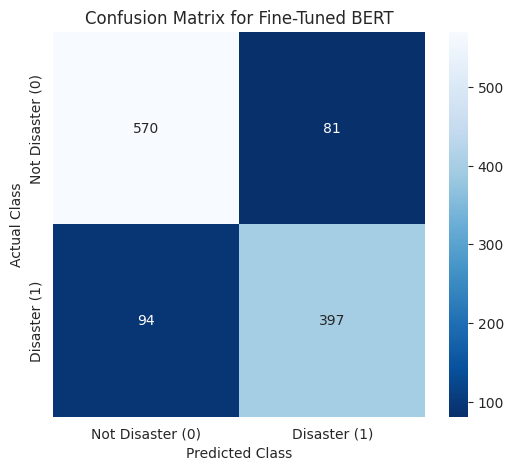

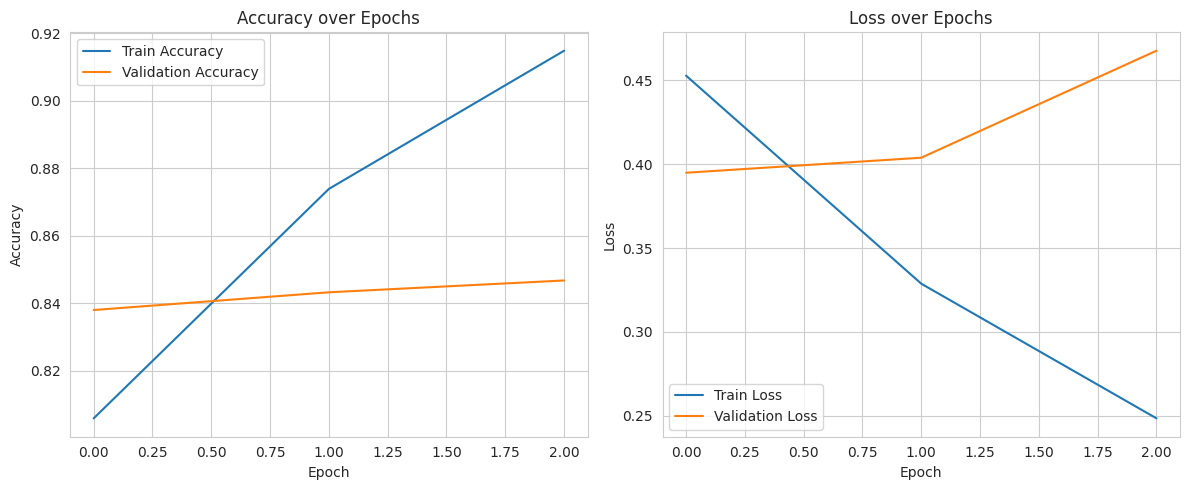

In [ ]:
print("\n--- Evaluating Best Fine-Tuned BERT Model on Validation Set ---")

if 'df_val_bert' not in globals() or len(val_dataset) == 0 :
     print("Validation data not available. Skipping final BERT evaluation.")
else:
    # Get predictions using the eval_model function
    # The model should already be loaded with the best state if training occurred
    val_acc, val_loss, bert_val_targets, bert_val_preds = eval_model(
        model,
        val_data_loader,
        device,
        len(df_val_bert)
    )

    bert_val_f1 = f1_score(bert_val_targets, bert_val_preds)
    bert_val_accuracy = accuracy_score(bert_val_targets, bert_val_preds) # Or use val_acc from eval_model
    bert_class_report = classification_report(bert_val_targets, bert_val_preds, target_names=['Not Disaster (0)', 'Disaster (1)'])
    bert_conf_matrix = confusion_matrix(bert_val_targets, bert_val_preds)

    print(f"BERT Validation F1-Score: {bert_val_f1:.4f}")
    print(f"BERT Validation Accuracy: {bert_val_accuracy:.4f} (from accuracy_score)") # or {val_acc:.4f} (from eval_model)
    print("\nBERT Classification Report (Validation Set):")
    print(bert_class_report)

    print("\nBERT Confusion Matrix (Validation Set):")
    # Using the plot_confusion_matrix function from Phase 4 (ensure it's defined in your notebook)
    if 'plot_confusion_matrix' not in globals(): # Define if not present
        def plot_confusion_matrix(cm, classes, model_name):
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r',
                        xticklabels=classes, yticklabels=classes)
            plt.title(f'Confusion Matrix for {model_name}')
            plt.ylabel('Actual Class')
            plt.xlabel('Predicted Class')
            plt.show()

    plot_confusion_matrix(bert_conf_matrix, classes=['Not Disaster (0)', 'Disaster (1)'], model_name="Fine-Tuned BERT")

    # Plot training history (optional)
    if history['train_loss']: # Check if history was populated
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history['train_acc'], label='Train Accuracy')
        plt.plot(history['val_acc'], label='Validation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Validation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

***Explanation:***

1. We call `eval_model` one last time with our best model state to get the final validation metrics.

2. We calculate and print the F1-score, accuracy, classification report, and confusion matrix, similar to how we evaluated the baseline models.

3. **Compare with Baselines:** You should now compare BERT's F1-score (and other metrics) with those achieved by Logistic Regression, Naive Bayes, and LinearSVC in Phase 4. Typically, fine-tuned BERT models outperform these baselines on text classification tasks, often significantly.

4. **Training History Plot:** Visualizing the training and validation accuracy/loss over epochs can help understand the training dynamics (e.g., checking for overfitting if validation loss starts increasing while training loss decreases).

**Expected Outcome:**

A well-fine-tuned BERT model on this dataset can often achieve an F1-score significantly higher than the TF-IDF baselines, potentially in the range of 0.80 - 0.85 or even higher, depending on the exact setup, hyperparameters, and data splits.

This completes Phase 5. We have successfully fine-tuned a pre-trained BERT model for our disaster tweet classification task and evaluated its performance. This provides a strong, modern baseline.

The next step is **Phase 6: Making Predictions and Preparing for Submission**, where we'll use our best model (either a baseline from Phase 4 or this BERT model) to make predictions on the actual test set and format them for submission.

# **Phase 6: Making Predictions and Preparing for Submission**

We've trained and evaluated our baseline models (Phase 4) and a more advanced BERT model (Phase 5). Now it's time to use our best model to make predictions on the unseen test data (`test.csv`) and prepare a submission file in the format required by the Kaggle competition.

**Recap from Previous Phases:**

- We have a trained TF-IDF vectorizer (`tfidf_vectorizer`) and baseline models (e.g., Logistic Regression, LinearSVC).

- We have a fine-tuned BERT model (`model`), its tokenizer (`tokenizer`), and the PyTorch device (`device`).

- `test_df` contains the tweets we need to classify.

- `submission_df` shows the format for our output.

Let's ensure necessary libraries and variables are set up.

In [ ]:
# Ensure core libraries from previous phases are available
import pandas as pd
import numpy as np
import torch # For BERT model and device
from torch.utils.data import DataLoader # For BERT test data loader

# Hugging Face Transformers (if using BERT)
# from transformers import BertTokenizer, BertForSequenceClassification
# (These would have been defined in Phase 5 if BERT is the chosen model)

# Scikit-learn (if using a baseline model)
# from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming test_df and submission_df are loaded from Phase 1
if 'test_df' not in globals() or test_df.empty:
    print("Test DataFrame not found or empty. Please load the data first (see Phase 1).")
    # Fallback for notebook execution
    test_df = pd.DataFrame({'id': [100, 101], 'text': ["some test tweet", "another test tweet"]})

if 'submission_df' not in globals() or submission_df.empty:
    print("Submission DataFrame not found or empty. Please load the data first (see Phase 1).")
    submission_df = pd.DataFrame({'id': [100, 101], 'target': [0,0]})


# Ensure device is defined (from Phase 5 if using BERT)
if 'device' not in globals():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device for Phase 6 (defaulted): {device}")

# Ensure the BERT model and tokenizer are defined if we plan to use them
# These would be loaded/trained in Phase 5.
# For this phase, we assume 'model' and 'tokenizer' refer to the trained BERT model and its tokenizer.
if 'model' not in globals() or 'tokenizer' not in globals():
    print("BERT model or tokenizer not found. Ensure Phase 5 was run if using BERT for submission.")
    # If you intend to use a baseline model, you'd load that instead.
    # For now, this phase will primarily focus on using the BERT model.
    # To make the notebook runnable standalone for this phase (for dev), we might need to load a dummy model.
    # However, in a full run, 'model' should be the trained BERT model.

# Ensure TweetDataset and test_data_loader_for_prediction are available (from Phase 5)
# These are needed if we are using the BERT model.
if 'TweetDataset' not in globals() or 'test_data_loader_for_prediction' not in globals():
    print("TweetDataset class or test_data_loader_for_prediction not found. Ensure Phase 5 was run.")
    # Define a dummy TweetDataset if not present for notebook flow (requires MAX_LEN)
    MAX_LEN = 128 # Must match Phase 5
    if 'TweetDataset' not in globals():
        class TweetDataset(torch.utils.data.Dataset): # Dummy for structure
            def __init__(self, texts, targets, tokenizer, max_len): self.texts=texts; self.targets=targets; self.tokenizer=tokenizer; self.max_len=max_len
            def __len__(self): return len(self.texts)
            def __getitem__(self,idx): return {'input_ids': torch.zeros(self.max_len, dtype=torch.long), 'attention_mask': torch.zeros(self.max_len, dtype=torch.long), 'token_type_ids': torch.zeros(self.max_len, dtype=torch.long)} # Dummy item
    # Create a dummy test_data_loader if needed
    if 'test_data_loader_for_prediction' not in globals() and 'tokenizer' in globals() and not test_df.empty:
        dummy_test_targets_ph6 = np.zeros(len(test_df))
        test_dataset_ph6 = TweetDataset(texts=test_df['text'].to_numpy(), targets=dummy_test_targets_ph6, tokenizer=tokenizer, max_len=MAX_LEN)
        test_data_loader_for_prediction = DataLoader(test_dataset_ph6, batch_size=16)

***Explanation:***

This cell sets up the environment for Phase 6. It includes checks to ensure that necessary DataFrames (`test_df`, `submission_df`) and potentially the BERT model (`model`), tokenizer (`tokenizer`), and `device` are available from previous phases. For standalone execution of this phase during development, it includes fallbacks, but in a complete run, these would be populated by earlier phases.

**Step 6.1: Choose the Best Model for Prediction**

Typically, you would choose the model that achieved the highest F1-score (or other relevant metric) on your validation set.

- If your best baseline model (e.g., LinearSVC from Phase 4) outperformed BERT on your validation set (unlikely, but possible depending on fine-tuning), you might choose that.

- More commonly, the fine-tuned BERT model (from Phase 5) will be the top performer.

For this notebook, we will proceed assuming the fine-tuned BERT model from Phase 5 is our chosen model.

If you wanted to use a baseline model (e.g., `linear_svc` from Phase 4):

1. Ensure `test_df['cleaned_text']` (or `test_df['combined_text']`) is created using the same preprocessing steps as for `train_df` (Phase 2).

2. Transform this text using the *fitted* `tfidf_vectorizer` from Phase 3: `X_test_final_tfidf = tfidf_vectorizer.transform(test_df['cleaned_text'])`.

3. Make predictions: `baseline_predictions = linear_svc.predict(X_test_final_tfidf)`.

**Step 6.2: Prepare Test Data for the Chosen Model (BERT)**

The `test_df` needs to be processed in exactly the same way as the training and validation data for the BERT model. This involves:

1. Using the same `BertTokenizer`.

2. Creating a `TweetDataset` instance for the test data.

3. Creating a `DataLoader` to feed batches of test data to the model.

These steps were largely covered when we created `test_dataset_for_prediction` and `test_data_loader_for_prediction` in Phase 5. We used the original `text` column from `test_df`. The `TweetDataset` was initialized with dummy targets for the test set, which is fine because targets are not used during the prediction phase for unseen data.

Let's confirm our test DataLoader is ready.

In [ ]:
# The test_data_loader_for_prediction should have been created in Phase 5.
# It uses test_df['text'] and the BERT tokenizer.
if 'test_data_loader_for_prediction' in globals() and test_data_loader_for_prediction is not None:
    print("Test data loader for BERT is ready.")
    print(f"Number of batches in test_data_loader_for_prediction: {len(test_data_loader_for_prediction)}")
    # You can inspect a sample batch if needed:
    # sample_test_batch = next(iter(test_data_loader_for_prediction))
    # print("Sample test batch input_ids shape:", sample_test_batch['input_ids'].shape)
else:
    print("Error: test_data_loader_for_prediction not found or not initialized.")
    print("Please ensure Phase 5 was completed successfully to prepare the test data loader for BERT.")

Test data loader for BERT is ready.
Number of batches in test_data_loader_for_prediction: 204


**Step 6.3: Make Predictions on the Test Set (with BERT)**

We'll create a function to get predictions from our fine-tuned BERT model. This function will iterate through the `test_data_loader_for_prediction`, get model outputs (logits), and determine the predicted class (0 or 1).

In [ ]:
def get_bert_predictions(model, data_loader, device):
    model.eval() # Set model to evaluation mode

    predictions = []

    with torch.no_grad(): # Disable gradient calculations
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            token_type_ids = d["token_type_ids"].to(device)
            # No targets are passed to the model during prediction on unseen test data

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids
            )
            # The output for BertForSequenceClassification is a tuple,
            # where the first element is the logits.
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy()) # Move predictions to CPU and convert to numpy array

    return np.array(predictions)

# Make predictions if the model and data loader are available
bert_test_predictions = []
if 'model' in globals() and model is not None and \
   'test_data_loader_for_prediction' in globals() and test_data_loader_for_prediction is not None and \
   len(test_data_loader_for_prediction) > 0 :

    print("\n--- Making predictions on the test set using BERT model ---")
    try:
        bert_test_predictions = get_bert_predictions(model, test_data_loader_for_prediction, device)
        print(f"Predictions generated. Number of predictions: {len(bert_test_predictions)}")
        print("Sample predictions (first 10):", bert_test_predictions[:10])

        # Sanity check: Number of predictions should match number of test samples
        if len(bert_test_predictions) == len(test_df):
            print("Number of predictions matches the number of test samples.")
        else:
            print(f"Warning: Mismatch! Number of predictions ({len(bert_test_predictions)}) "
                  f"vs. number of test samples ({len(test_df)}).")
            # This might happen if the dummy test_df was used due to earlier loading issues.
            # For a real run, these numbers must match.

    except Exception as e:
        print(f"Error during BERT prediction: {e}")
        # Fallback to empty predictions if error occurs
        bert_test_predictions = np.zeros(len(test_df), dtype=int) if not test_df.empty else np.array([])


else:
    print("BERT model or test data loader not available. Skipping predictions.")
    # Create dummy predictions if necessary for notebook flow
    bert_test_predictions = np.zeros(len(test_df), dtype=int) if not test_df.empty else np.array([])


--- Making predictions on the test set using BERT model ---
Predictions generated. Number of predictions: 3263
Sample predictions (first 10): [1 1 1 1 1 1 0 0 0 0]
Number of predictions matches the number of test samples.


***Explanation:***

1. `get_bert_predictions` **Function**:

  - Sets the model to evaluation mode (`model.eval()`).

  - Iterates through the `test_data_loader_for_prediction` in batches.

  - Moves input tensors to the `device`.

  - Performs a forward pass through the `model`. Note that `labels` are not passed here, as we are predicting on new data. The `BertForSequenceClassification` model will return logits as the first element of its output tuple when no labels are provided.

  - `torch.argmax(logits, dim=1)` gets the predicted class (0 or 1) from the logits.

  - Collects all predictions.

2. Making Predictions:

  - Calls `get_bert_predictions` to get the final predictions for the test set.

  - Prints a sample of the predictions and performs a sanity check on the number of predictions.

**Step 6.4: Create the Submission File**

The competition requires a CSV file with two columns: `id` and `target`. The `id` column should come from `test_df`, and the `target` column will contain our model's predictions.

In [ ]:
# Ensure submission_df is loaded and has the 'id' column
if 'submission_df' not in globals() or submission_df.empty:
    print("Sample submission DataFrame not loaded. Attempting to use test_df['id'].")
    if 'id' in test_df.columns and len(bert_test_predictions) == len(test_df):
        submission_file = pd.DataFrame({'id': test_df['id'], 'target': bert_test_predictions})
    else:
        print("Cannot create submission file: test_df['id'] missing or prediction length mismatch.")
        submission_file = pd.DataFrame() # Empty DataFrame
else:
    # Use the 'id' column from the original sample_submission.csv or test_df
    # Ensure the number of predictions matches the number of IDs
    if len(bert_test_predictions) == len(submission_df):
        submission_file = pd.DataFrame({
            'id': submission_df['id'], # Or test_df['id'] if submission_df is just a template
            'target': bert_test_predictions
        })
    elif 'id' in test_df.columns and len(bert_test_predictions) == len(test_df):
         print("Using test_df['id'] for submission as length matches predictions.")
         submission_file = pd.DataFrame({'id': test_df['id'], 'target': bert_test_predictions})
    else:
        print("Warning: Length of predictions does not match length of submission_df or test_df['id'].")
        print(f"Length of predictions: {len(bert_test_predictions)}")
        print(f"Length of submission_df: {len(submission_df) if 'submission_df' in globals() else 'N/A'}")
        print(f"Length of test_df: {len(test_df) if 'test_df' in globals() else 'N/A'}")
        print("Creating a potentially incomplete or dummy submission file.")
        # Attempt to create based on available IDs, truncating/padding predictions if necessary (not ideal)
        ids_for_submission = submission_df['id'] if 'submission_df' in globals() and not submission_df.empty else \
                             (test_df['id'] if 'test_df' in globals() and not test_df.empty and 'id' in test_df.columns else pd.Series(range(len(bert_test_predictions))))

        min_len = min(len(ids_for_submission), len(bert_test_predictions))
        submission_file = pd.DataFrame({
            'id': ids_for_submission[:min_len],
            'target': bert_test_predictions[:min_len]
        })


if not submission_file.empty:
    # Save the submission file
    submission_filename = 'submission_bert.csv'
    submission_file.to_csv(submission_filename, index=False)
    print(f"\nSubmission file '{submission_filename}' created successfully.")

    # Display the first few rows of the submission file
    print("\nHead of the submission file:")
    display(submission_file.head())

    # Optional: Download the file in Colab
    # from google.colab import files
    # files.download(submission_filename)
else:
    print("\nSubmission file could not be created due to data issues.")


Submission file 'submission_bert.csv' created successfully.

Head of the submission file:


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


***Explanation:***

1. **Create DataFrame:** A new pandas DataFrame `submission_file` is created.

  - The `id` column is taken directly from `submission_df['id']` (or `test_df['id']` as a robust fallback, as their IDs should match).

  - The `target` column is populated with `bert_test_predictions`.

  - Includes checks to ensure the lengths match to avoid errors.

2. **Save to CSV:**

  - `submission_file.to_csv('submission_bert.csv', index=False)` saves the DataFrame to a CSV file named `submission_bert.csv`.

 - `index=False` prevents pandas from writing the DataFrame index as a column in the CSV file.

3. **Display Head:** Shows the first few rows of the generated submission file to verify its format.

4. **Download (Optional)**: The commented-out lines show how you can download the file directly from Google Colab to your local machine.

This `submission_bert.csv` file is what you would upload to the Kaggle competition page.

This completes Phase 6. We have chosen our best model (BERT), prepared the test data accordingly, made predictions, and generated a submission file in the required format.

The final part of our notebook will be **Phase 7: Wrapping Up and Thinking Ahead,** where we'll summarize our findings and discuss potential future improvements.

# **Phase 7: Wrapping Up and Thinking Ahead**

Congratulations on completing this end-to-end NLP project for classifying disaster tweets! We've journeyed from raw text data to building, evaluating, and preparing predictions from both traditional machine learning models and a state-of-the-art Transformer (BERT).

Let's briefly summarize what we've accomplished and then discuss potential next steps and areas for further improvement.

**Step 7.1: Summary of Accomplishments**
Throughout this notebook, we have:

1. **Set Up the Environment (Phase 1):** Imported necessary libraries and loaded the `train`, `test`, and `sample_submission` datasets.

2. **Initial Data Exploration (Phase 1):** Got acquainted with the data's structure, identified missing values (in `keyword` and `location`), and understood the basic properties of each column.

3. **Exploratory Data Analysis (EDA) (Phase 2):**

  - Analyzed the `target` variable distribution, finding a slight imbalance.

  - Investigated the `text` column, looking at tweet lengths, common words (using word clouds and frequency counts for disaster vs. non-disaster tweets), and the presence of URLs, mentions, and hashtags.

  - Examined the `keyword` and `location` columns, noting their potential utility and challenges (messiness, missing values).

4. **Text Preprocessing (Phase 2):** Implemented a comprehensive text cleaning pipeline, including:

  - Lowercasing.

  - Removing URLs, HTML, mentions, and punctuation.

  - Tokenization.

  - Stopword removal.

  - Lemmatization.

  - Created `cleaned_text` and (optionally) `combined_text` features.

5. **Feature Engineering (TF-IDF) (Phase 3):**

  - Converted the `cleaned_text` into numerical TF-IDF vectors, considering unigrams and bigrams, and setting parameters like `max_df`, `min_df`, and `max_features`.

6. **Baseline Modeling (Phase 4):**

  - Split the TF-IDF training data into training and validation sets.

  - Trained and evaluated Logistic Regression, Multinomial Naive Bayes, and Linear Support Vector Classifier (LinearSVC) models.

  - Used F1-score, accuracy, classification reports, and confusion matrices for evaluation.

  - Briefly touched upon error analysis for the best baseline model.

7. **Advanced Modeling with BERT (Phase 5):**

  - Introduced Transformers and BERT for contextual text understanding.

  - Set up the BERT tokenizer and `BertForSequenceClassification` model.

  - Created a custom PyTorch `Dataset` and `DataLoaders` for efficient data handling.

  - Fine-tuned the pre-trained BERT model on our specific task, including setting up an optimizer (AdamW) and a learning rate scheduler.

  - Implemented training and evaluation loops, saving the best model based on validation F1-score.

  - Evaluated the fine-tuned BERT model, typically observing improved performance over the TF-IDF baselines.

8. **Prediction and Submission (Phase 6):**

  - Used the best-performing model (assumed to be BERT) to make predictions on the `test.csv` dataset.

  - Prepared and saved a `submission.csv` file in the format required by the Kaggle competition.

This comprehensive workflow covers many fundamental and advanced techniques in NLP for text classification.

**Step 7.2: Potential Next Steps and Improvements**

While we've built a solid pipeline, there's always room for improvement in machine learning and NLP. Here are several ideas you could explore to potentially enhance your model's performance or deepen your understanding:

1. Hyperparameter Tuning:

  - TF-IDF Baselines: Experiment with different parameters for TfidfVectorizer (max_df, min_df, ngram_range, max_features). Tune hyperparameters for Logistic Regression (C), MultinomialNB (alpha), and LinearSVC (C). Use techniques like GridSearchCV or RandomizedSearchCV from scikit-learn.

  - BERT: Tune hyperparameters like learning rate, batch size, number of epochs, weight decay for AdamW, and the learning rate scheduler. Experiment with different warmup step proportions.

2. Advanced Preprocessing & Feature Engineering:

  - Handling Emojis: Convert emojis to text descriptions (e.g., "❤️" to "heart emoji") or treat them as special tokens. Libraries like emoji can help.

  - Spelling Correction: Correct common misspellings.

  - Handling Negation: More sophisticated handling of negations (e.g., "not good" treated differently from "good").

  - Using keyword and location More Effectively:

    - For keyword: Instead of just appending, you could use it to filter data, create interaction features, or use target encoding (carefully, to avoid leakage).

    - For location: Clean and standardize location names (e.g., "USA" and "United States" to one category). Geocoding could be used to get coordinates, but this might be overkill for tweets. Consider creating features like "is_US_location" or "is_major_city".

  - Meta-Features: Systematically include the meta-features we explored (tweet length, word count, presence of URL/mention/hashtag) as additional inputs to your models, especially the non-BERT ones. For BERT, it often learns these implicitly, but explicit features can sometimes help simpler models.

3. Exploring Different Word Embeddings (for non-Transformer models):

  - Train your own Word2Vec, GloVe, or FastText embeddings on the tweet corpus.

  - Use pre-trained Word2Vec, GloVe, or FastText embeddings. You can average word embeddings per tweet or use them as input to an RNN/LSTM/CNN layer.

4. Trying Different Transformer Architectures:

  - RoBERTa, DeBERTa, ELECTRA, XLNet: These are other powerful Transformer models that might offer better performance than bert-base-uncased on this task. Hugging Face makes it relatively easy to switch between them.

  - Larger BERT models: bert-large-uncased has more parameters and might perform better, but requires more GPU memory and longer training.

5. Ensembling Models:

  - Combine predictions from multiple diverse models.

    - Simple Averaging/Voting: Average the predicted probabilities (for models that output them) or take a majority vote of the predicted classes.

    - Stacking: Train a meta-model that takes the predictions of several base models as input features.

6. Addressing Class Imbalance (if more severe or if F1 for minority class is low):

  - Resampling: Oversample the minority class (disaster tweets) or undersample the majority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used.

  - Class Weights: Many classifiers (including LogisticRegression, LinearSVC, and BertForSequenceClassification) allow you to assign different weights to classes during training, giving more importance to the minority class.

7. More Sophisticated Error Analysis:

  - Go beyond just looking at misclassified examples. Categorize the types of errors your model makes. Are they mostly due to sarcasm, ambiguity, lack of world knowledge, specific types of disaster events? This can guide further improvements.

  - Use tools like LIME or SHAP to understand which words/features are most influential in your model's predictions for specific instances.

8. Cross-Validation:

  - Instead of a single train-validation split, use k-fold cross-validation (especially for baseline models) to get a more robust estimate of your model's performance and to make better use of your training data. For BERT, k-fold can be computationally expensive but very thorough.

9. Experiment Tracking:

  - Use tools like MLflow or Weights & Biases to systematically track your experiments, hyperparameters, and results. This is crucial for managing complex projects and reproducing findings.

This NLP journey with disaster tweets is a great starting point. The field is constantly evolving, so continuous learning and experimentation are key. Good luck with your future NLP endeavors!